In [1]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

# 08 그래프 만들기

## 08-1 파이썬에서 다룰 수 있는 그래프 살펴보기

## 08-2 산점도 - 변수간 관계 표현하기

<AxesSubplot:xlabel='displ', ylabel='hwy'>

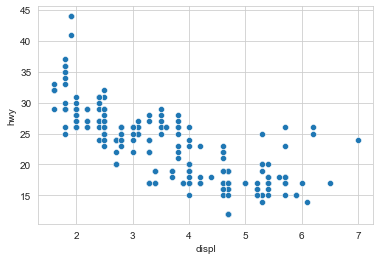

In [2]:
# X축은 displ, y축은 hwy를 나타난 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(3.0, 6.0)]

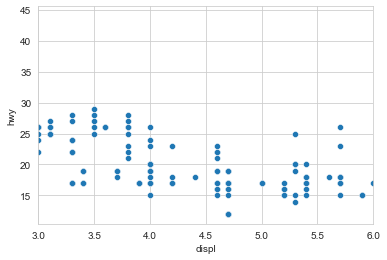

In [3]:
# x축 범위 3~6으로 제한하기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
.set(xlim = (3, 6))

[(3.0, 6.0), (10.0, 30.0)]

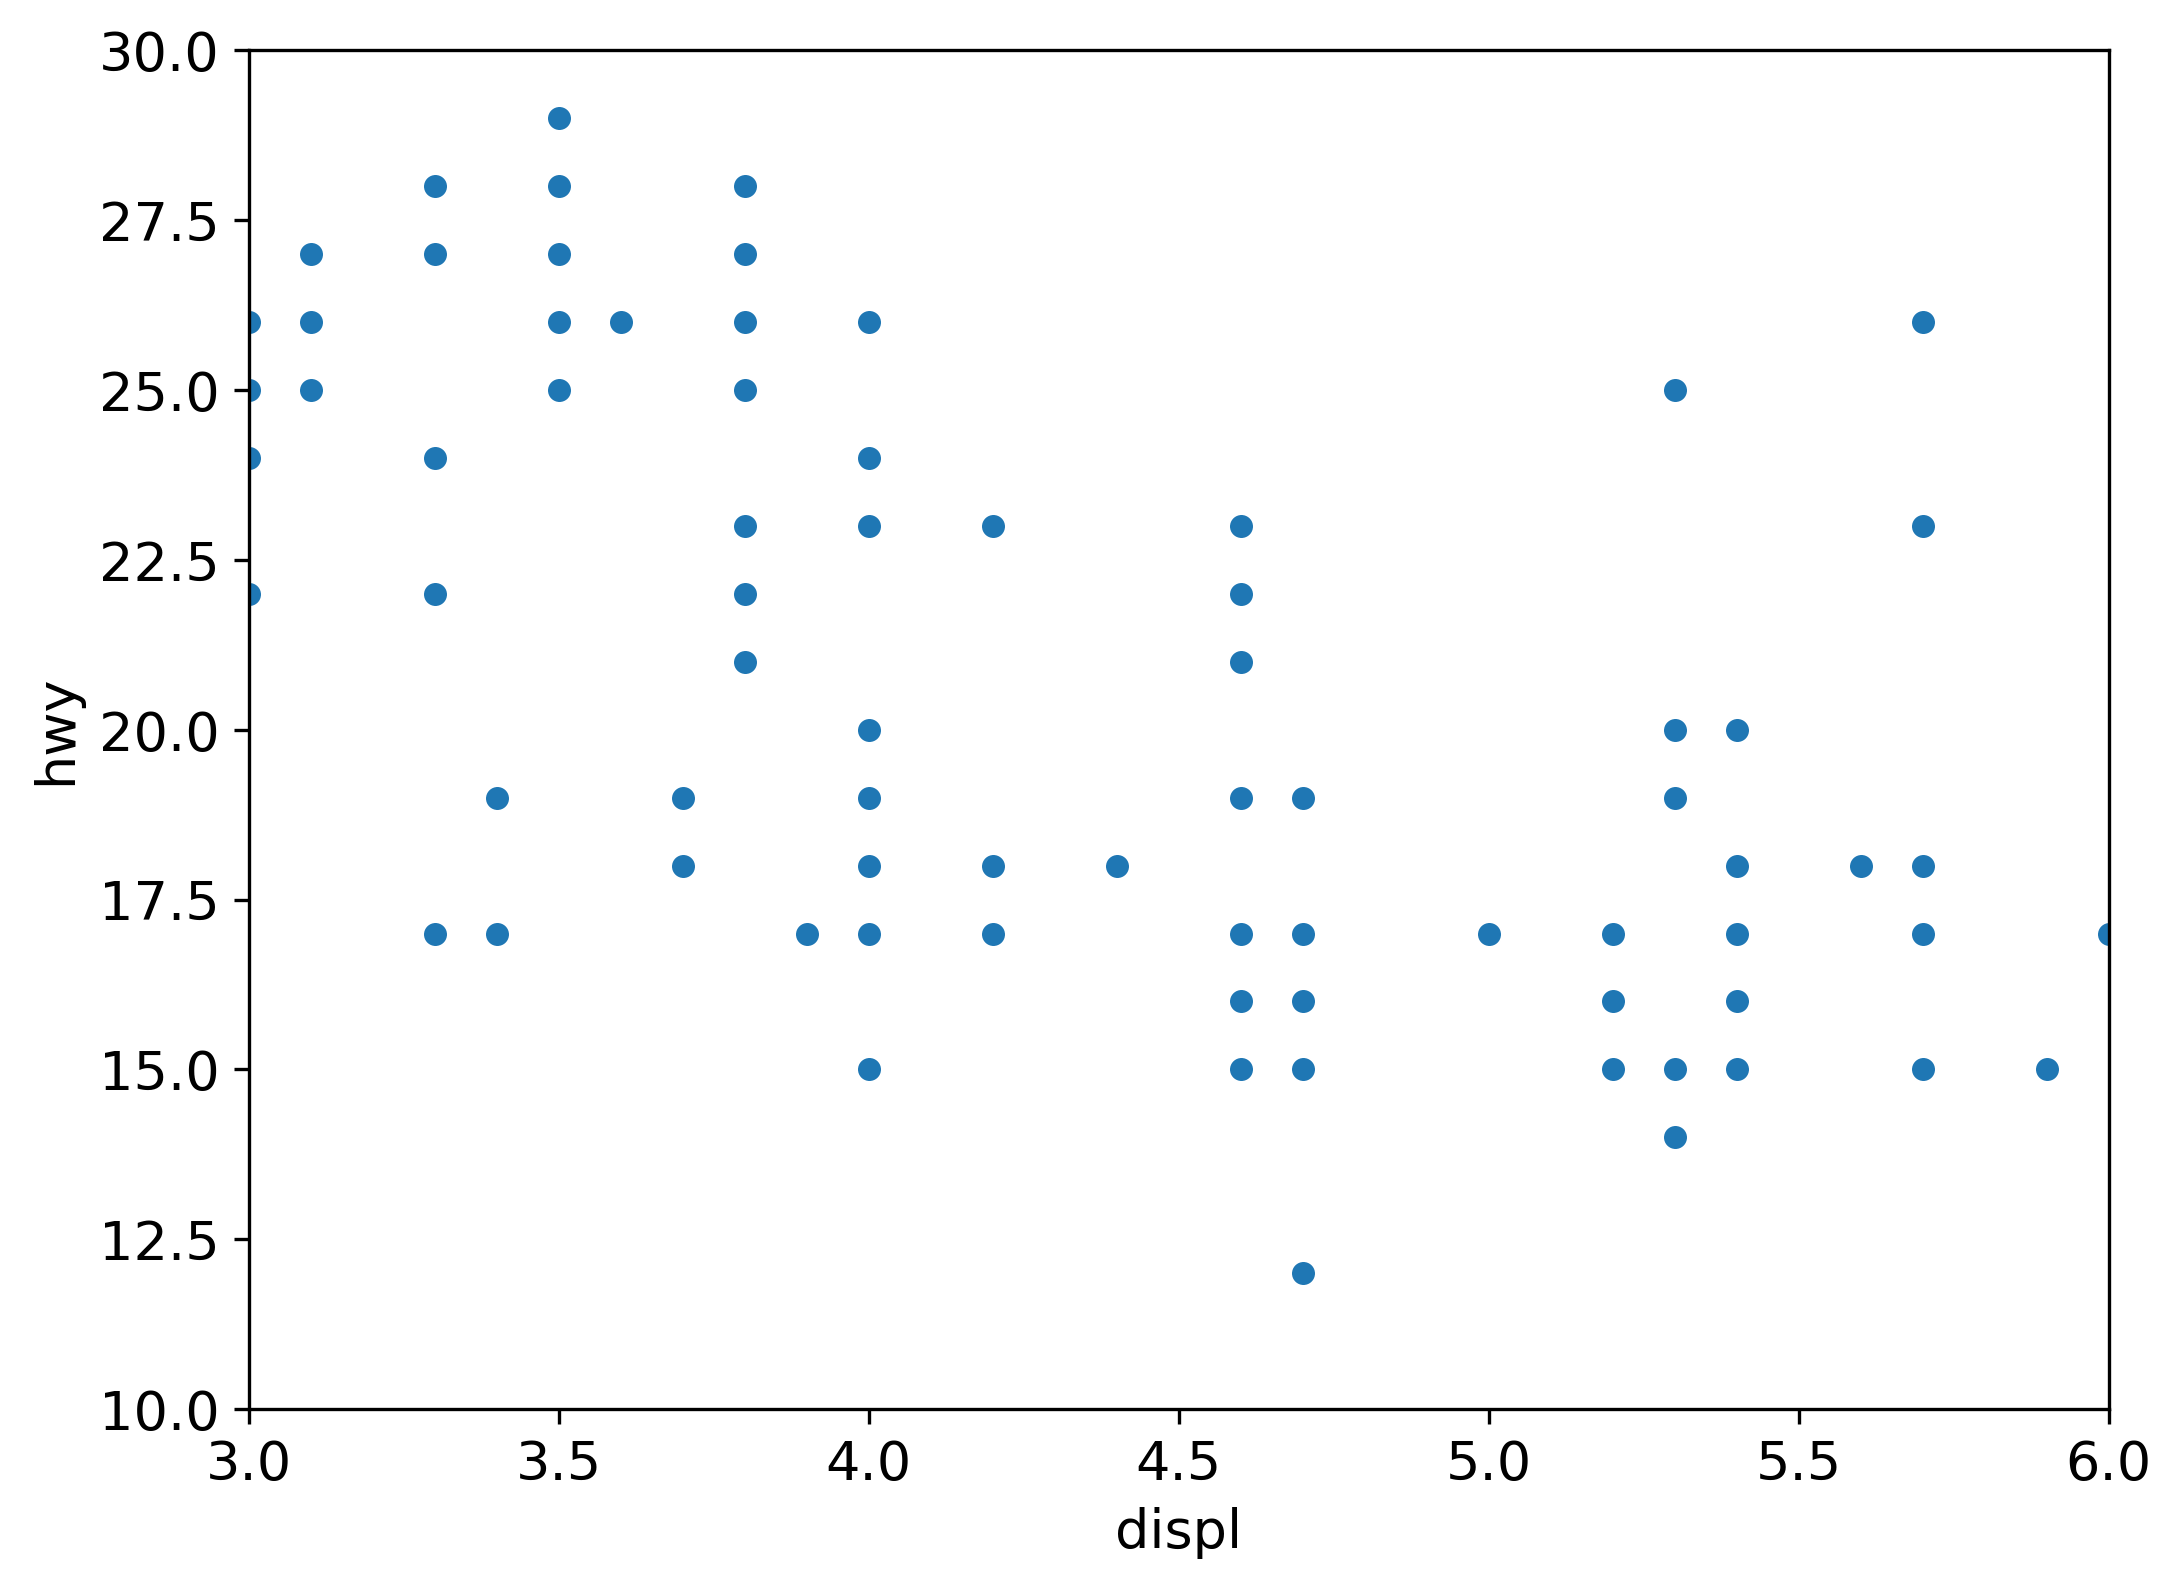

In [48]:
# x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
.set(xlim = (3, 6), ylim = (10, 30))

<AxesSubplot:xlabel='displ', ylabel='hwy'>

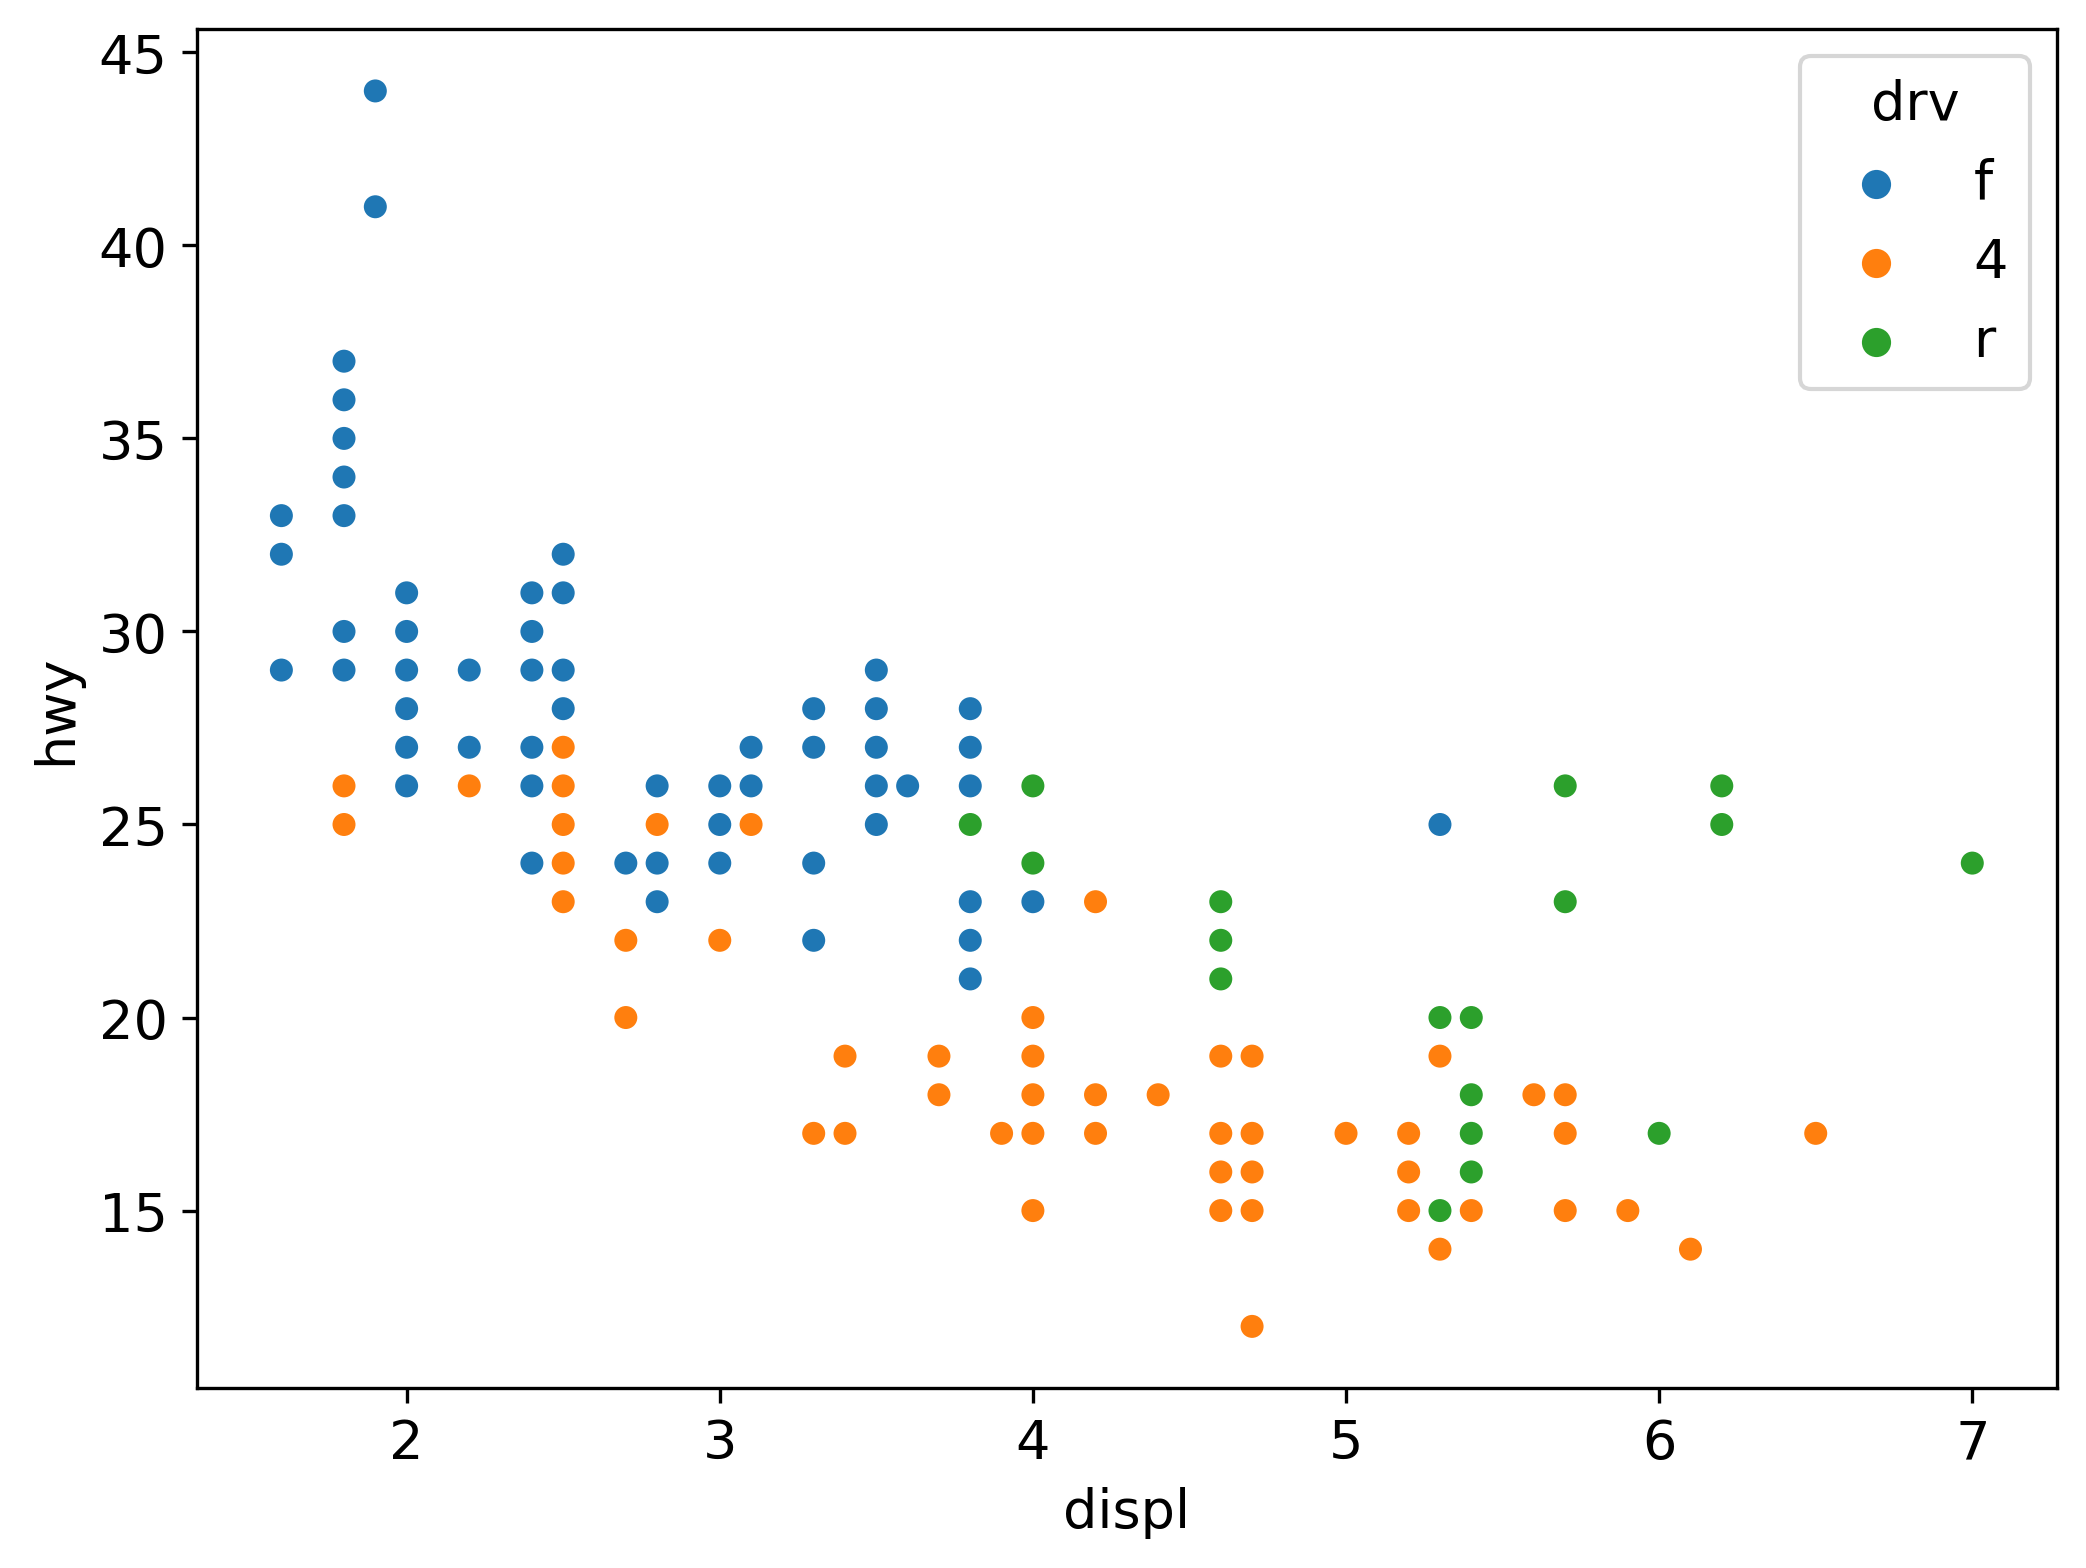

In [49]:
# drv 별로 표식 색상을 다르게 표현하기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '300',
                    'figure.figsize' : [8, 6],
                    'font.size' : 13,
                    'font.family' : 'sans-serif'})

<AxesSubplot:xlabel='cty', ylabel='hwy'>

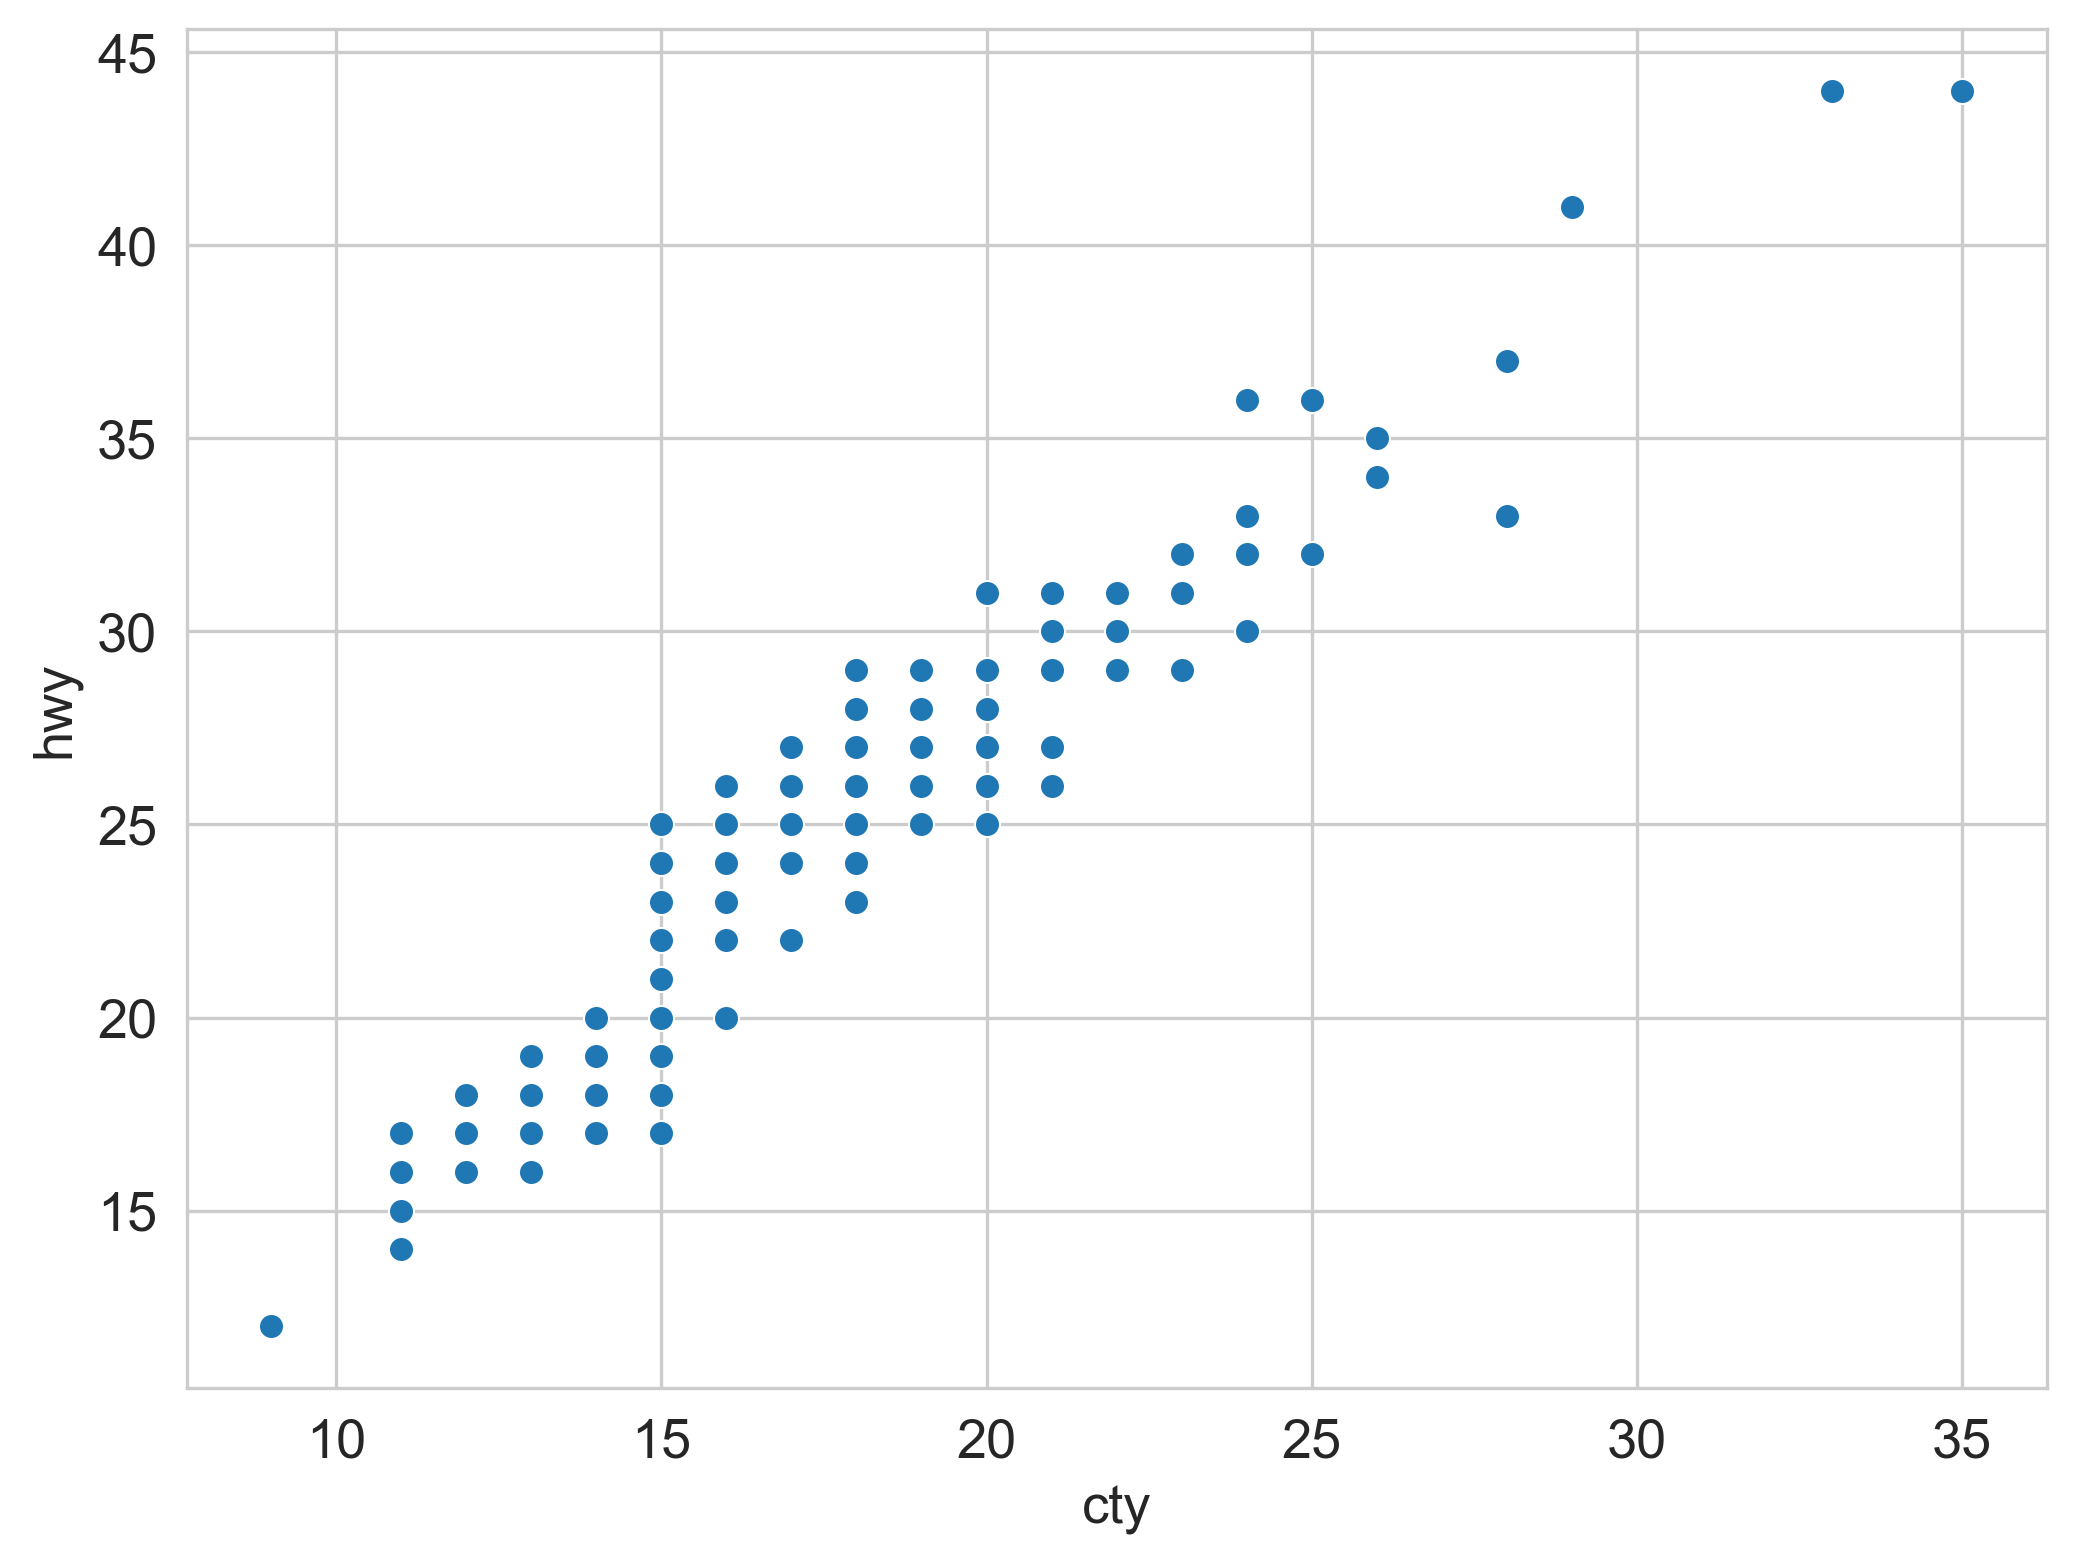

In [6]:
# 1
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')

## 08-3 막대 그래프 - 집단 간 차이 표현하기

[(0.0, 500000.0), (0.0, 10000.0)]

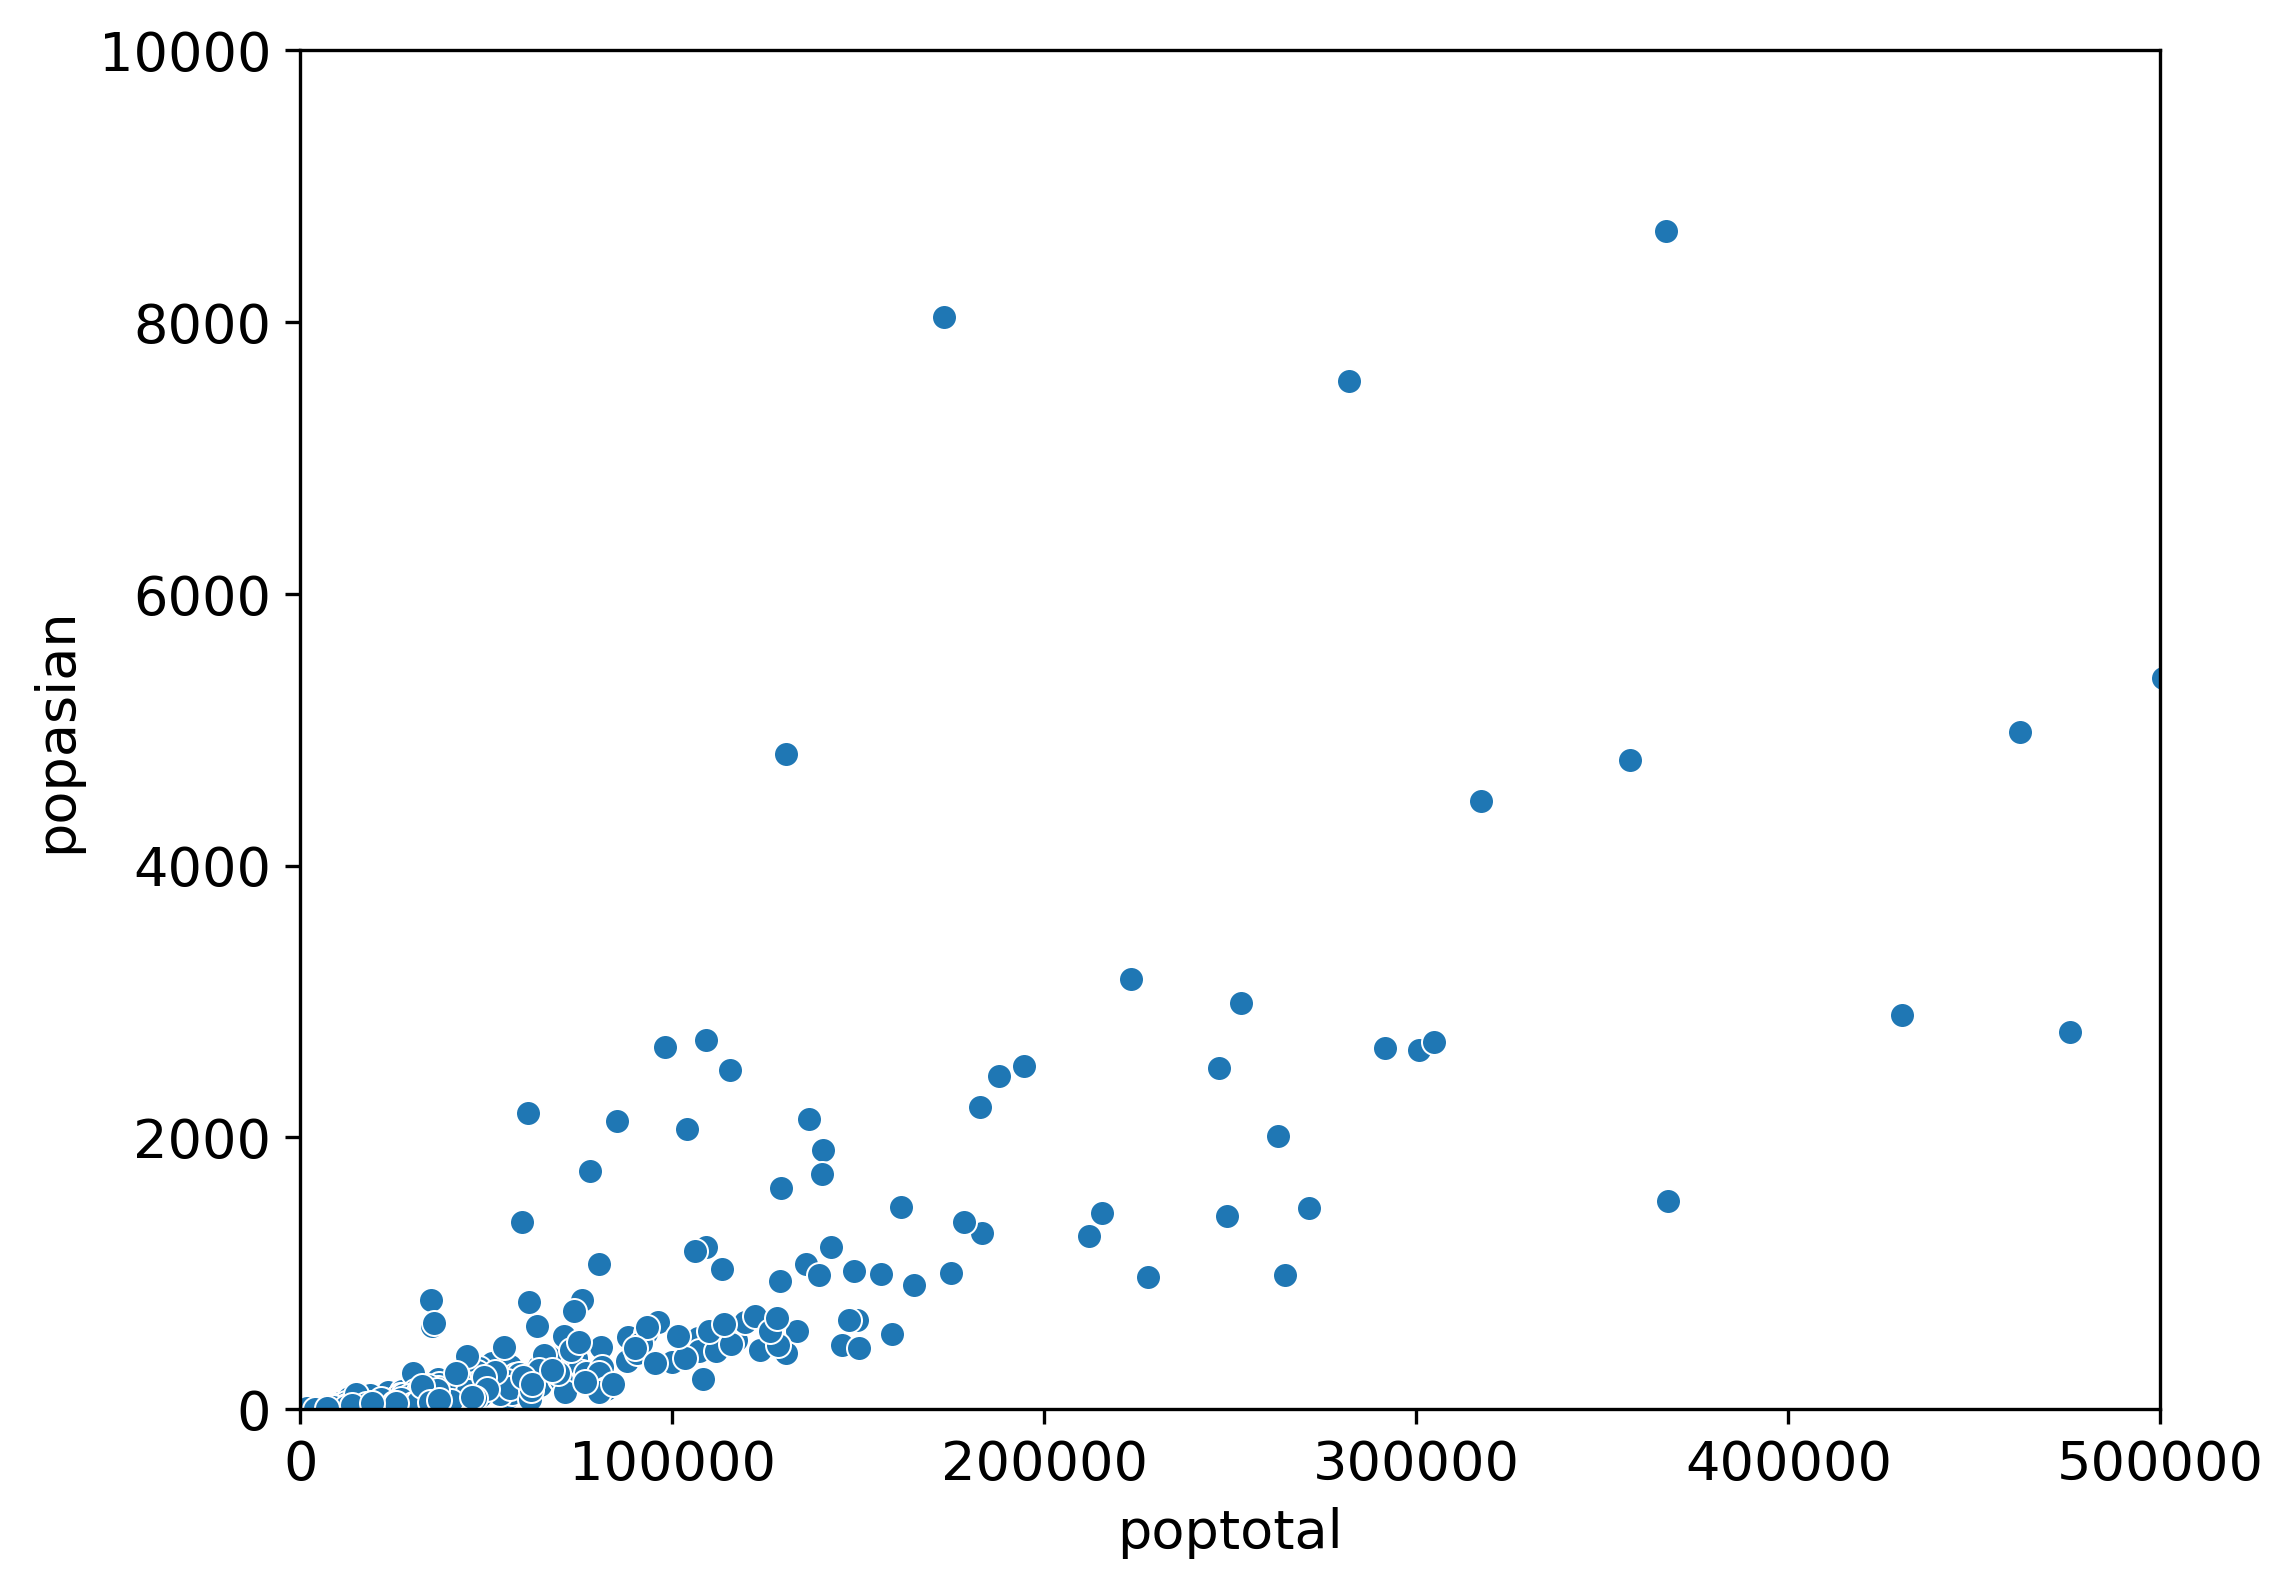

In [8]:
midwest = pd.read_csv('midwest.csv')
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian')\
.set(xlim = (0, 500000), ylim = (0, 10000))

In [9]:
df_mpg = mpg.groupby('drv').agg(meah_hwy = ('hwy', 'mean'))

In [10]:
df_mpg

,meah_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [11]:
df_mpg = mpg.groupby('drv', as_index = False)\
.agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

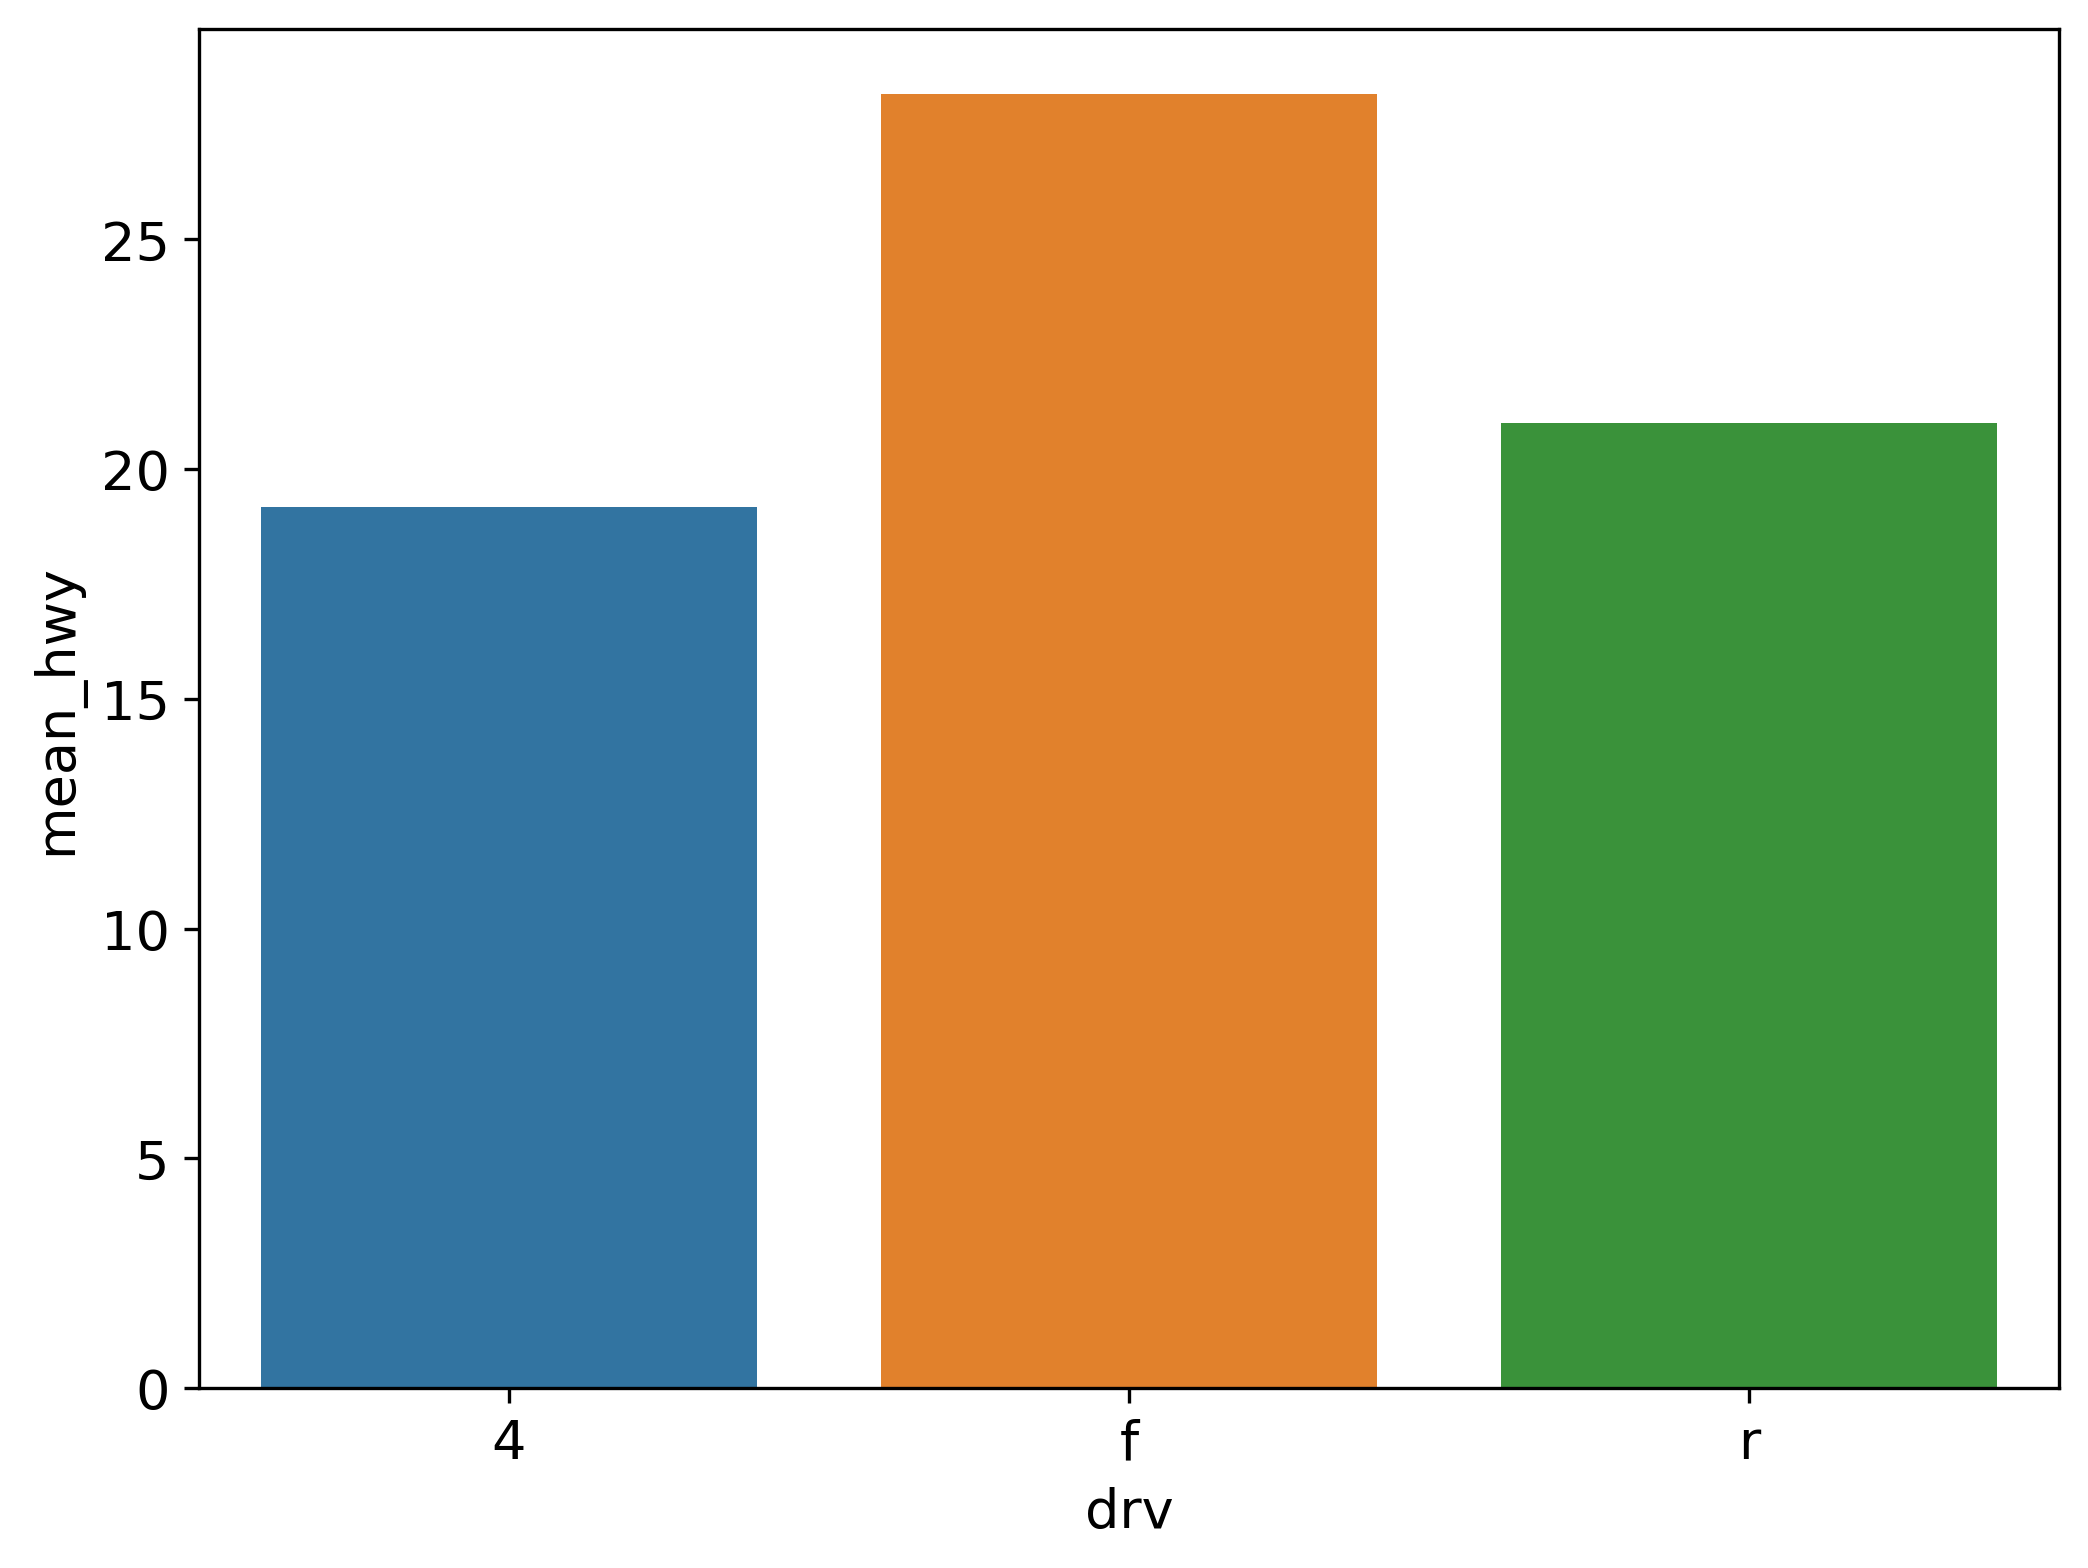

In [12]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

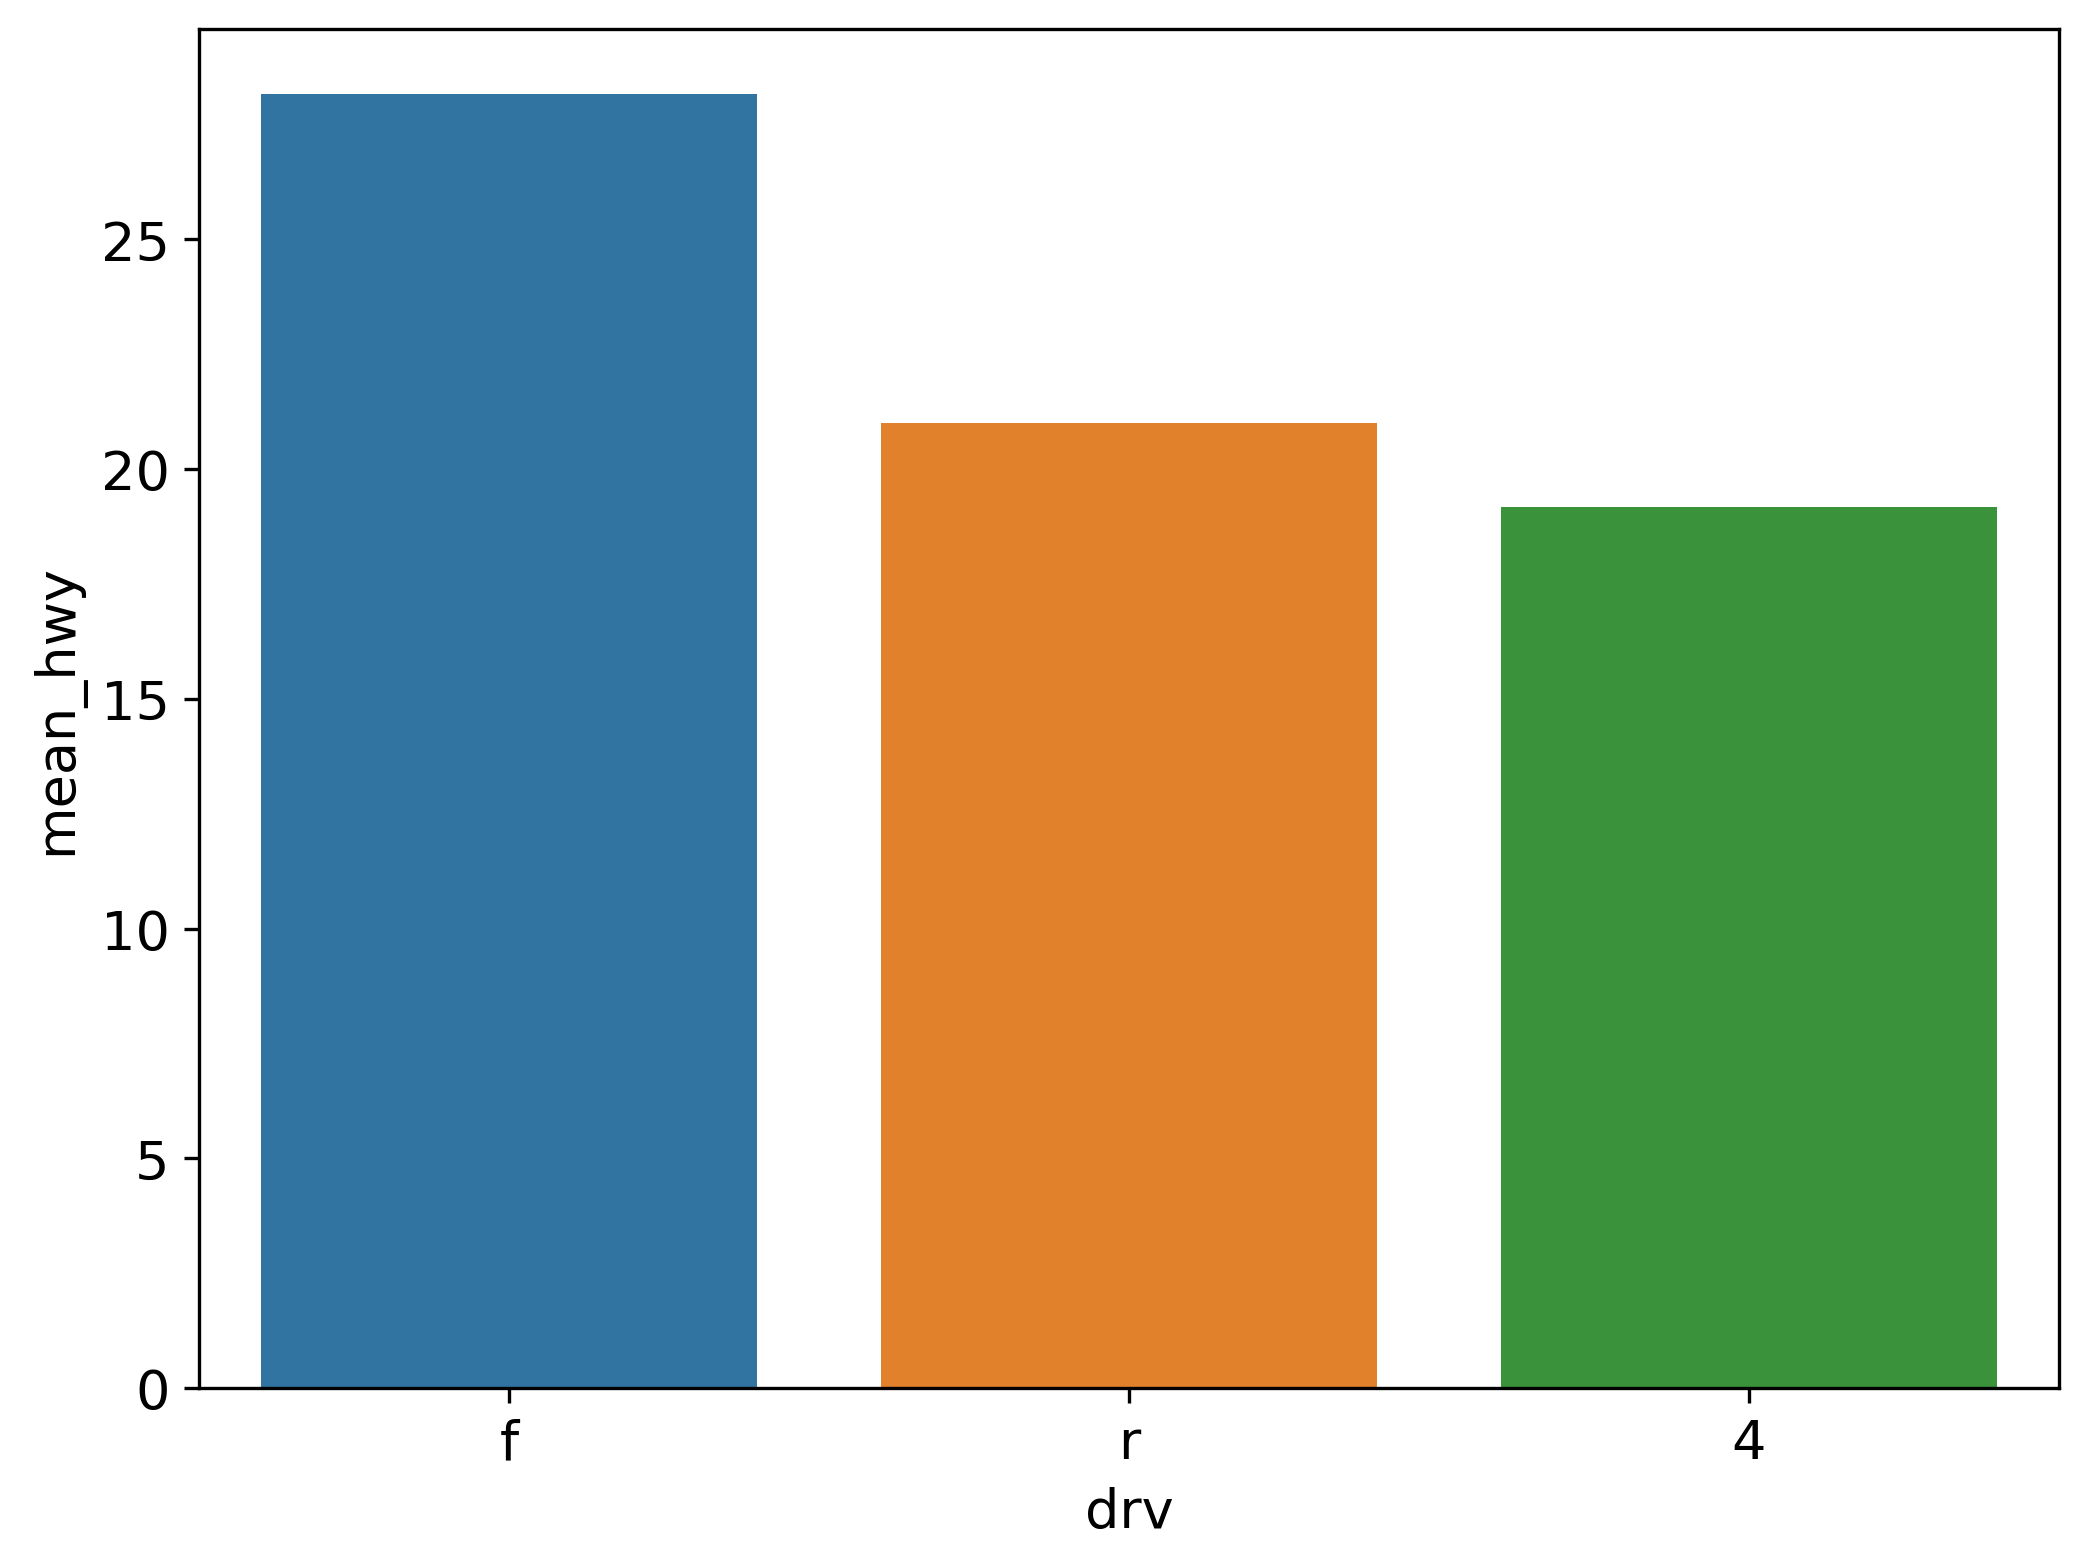

In [13]:
# data frame 정렬
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)

# make barplot
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

In [14]:
# 집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index = False)\
.agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<AxesSubplot:xlabel='drv', ylabel='n'>

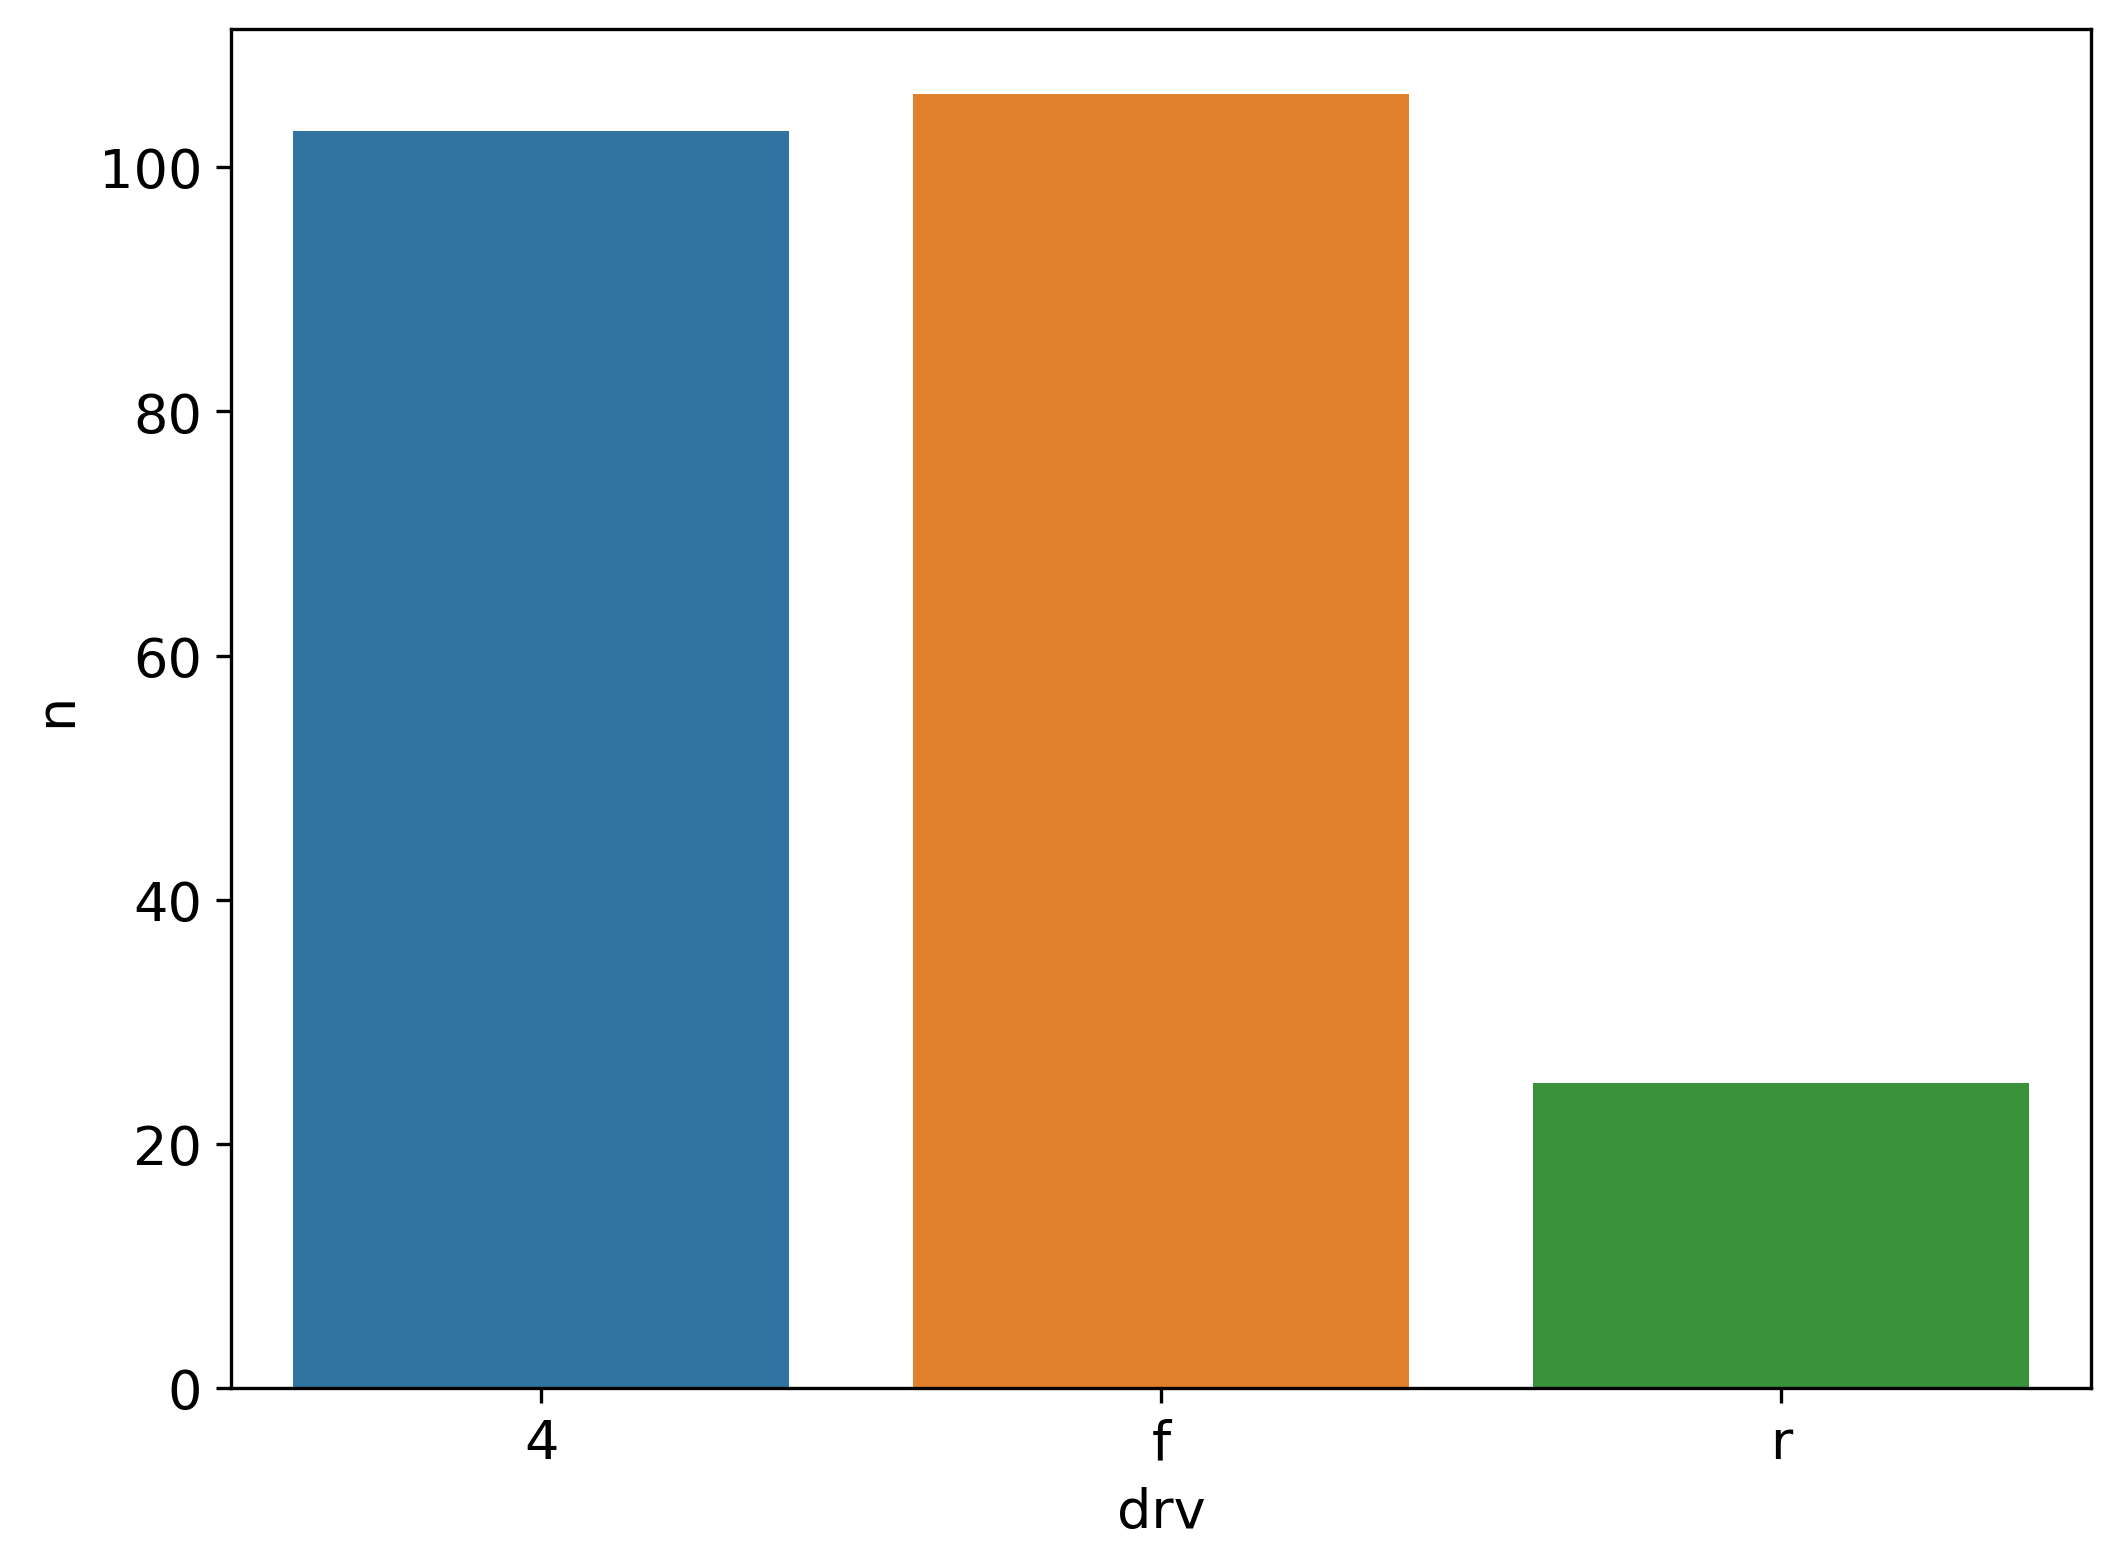

In [15]:
# make barplot
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

<AxesSubplot:xlabel='drv', ylabel='count'>

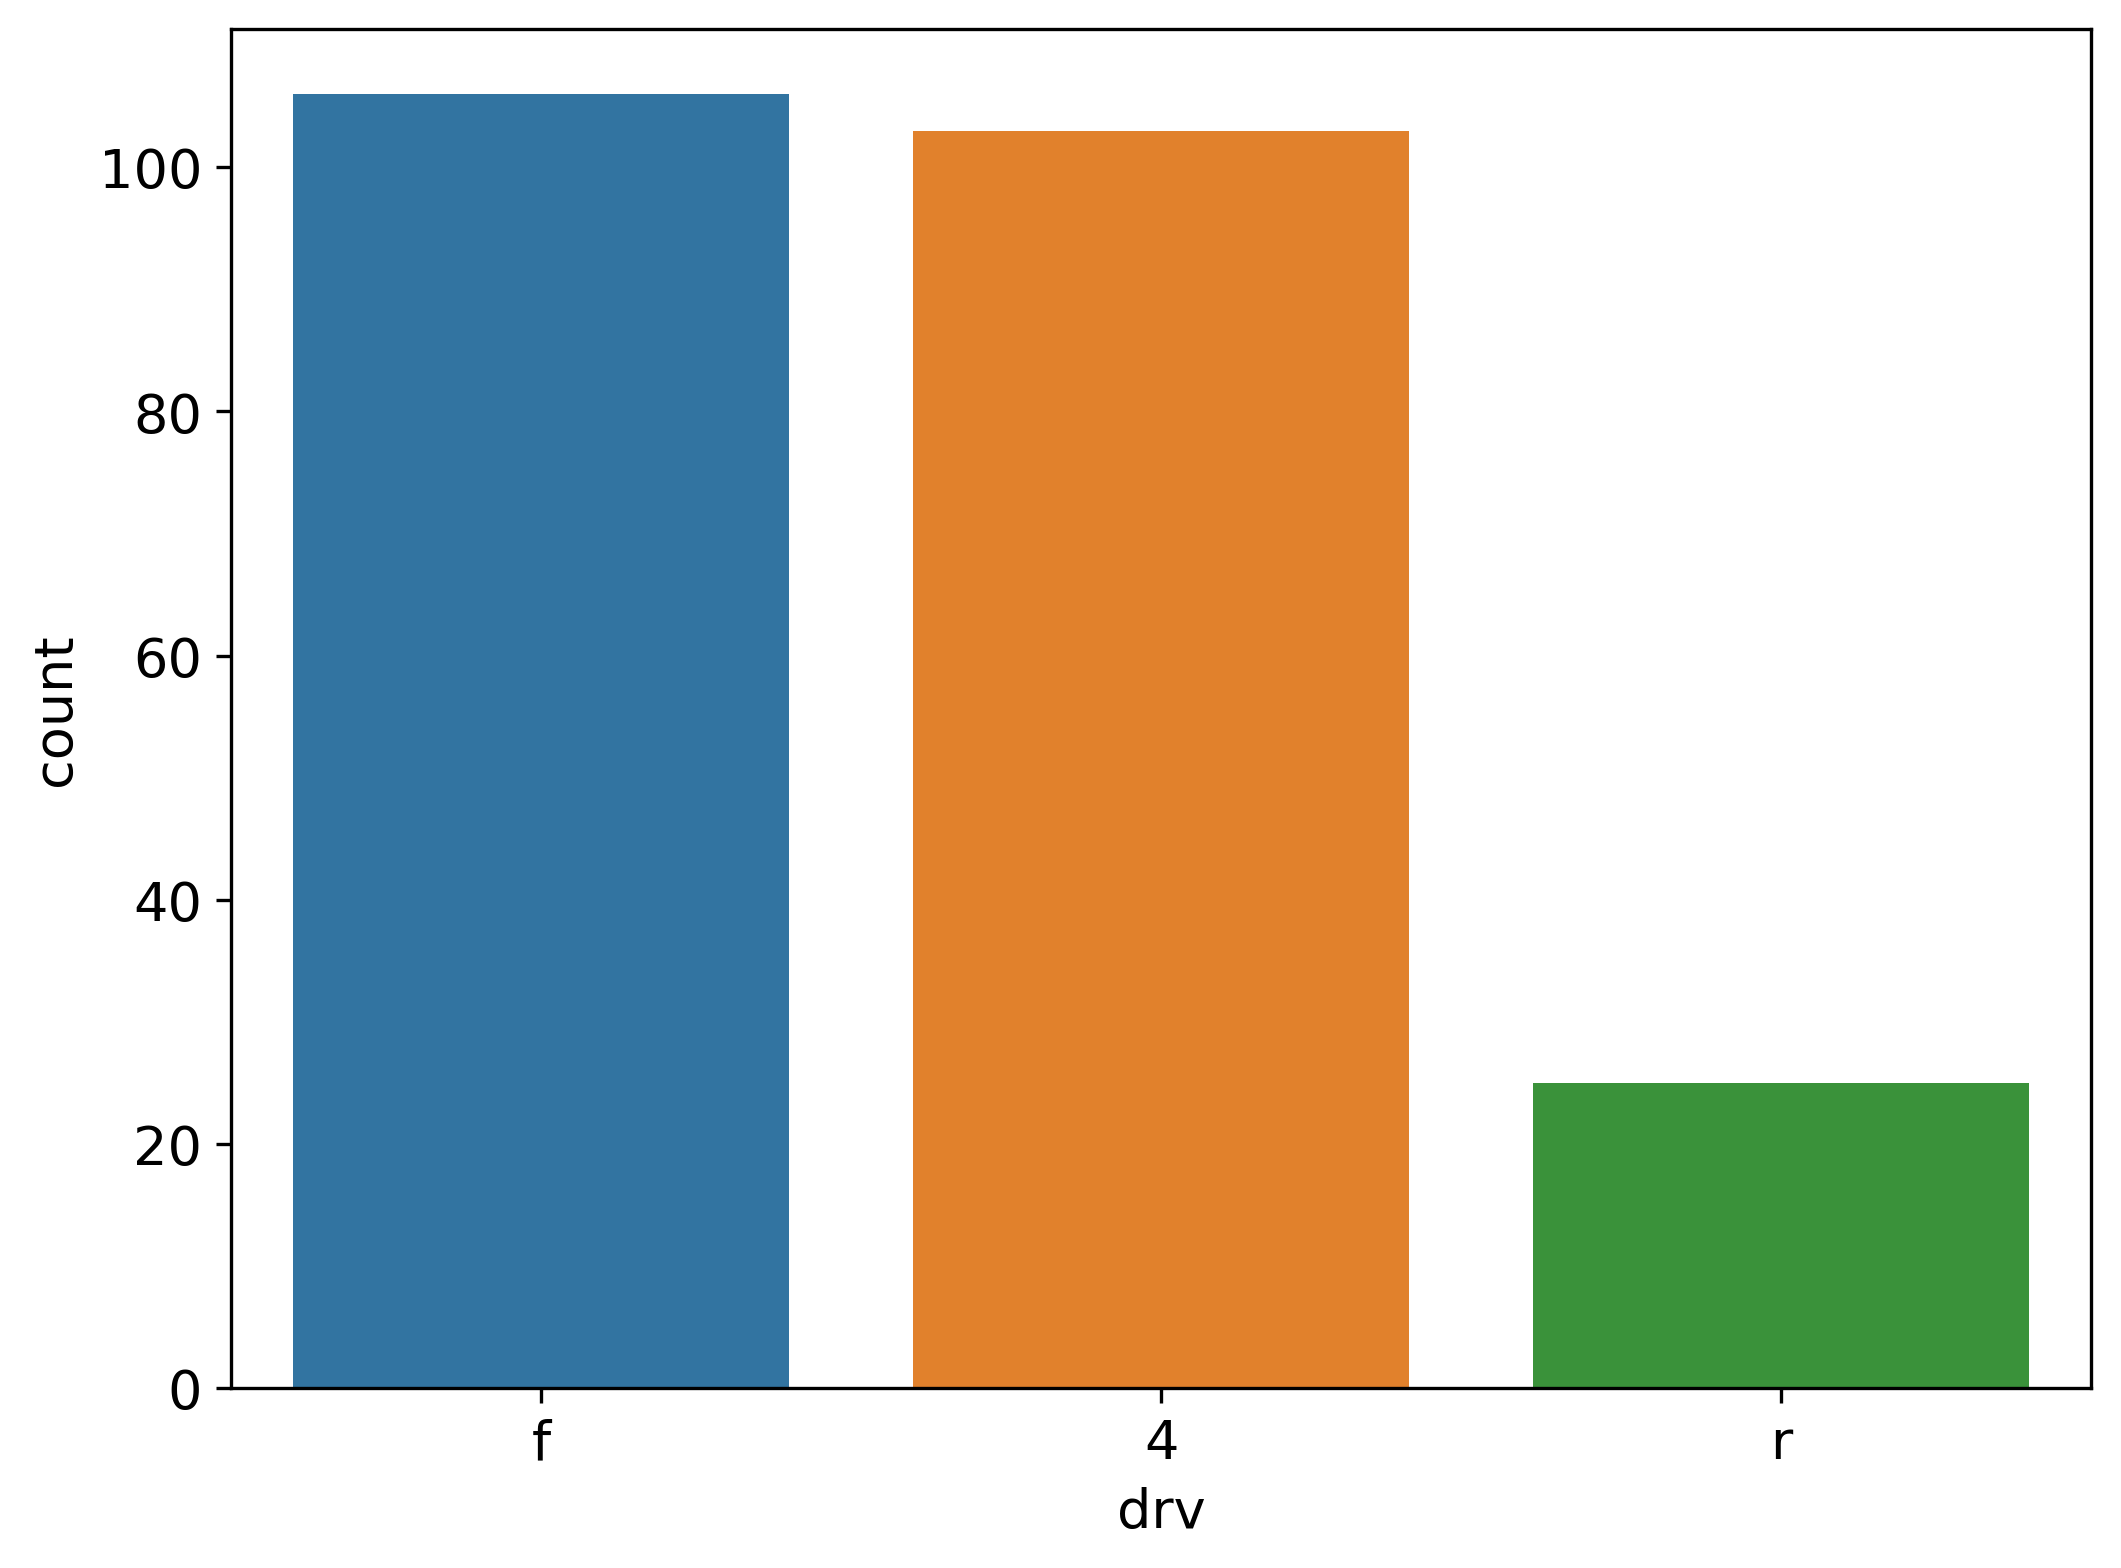

In [16]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv')

In [17]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [18]:
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

<AxesSubplot:xlabel='drv', ylabel='count'>

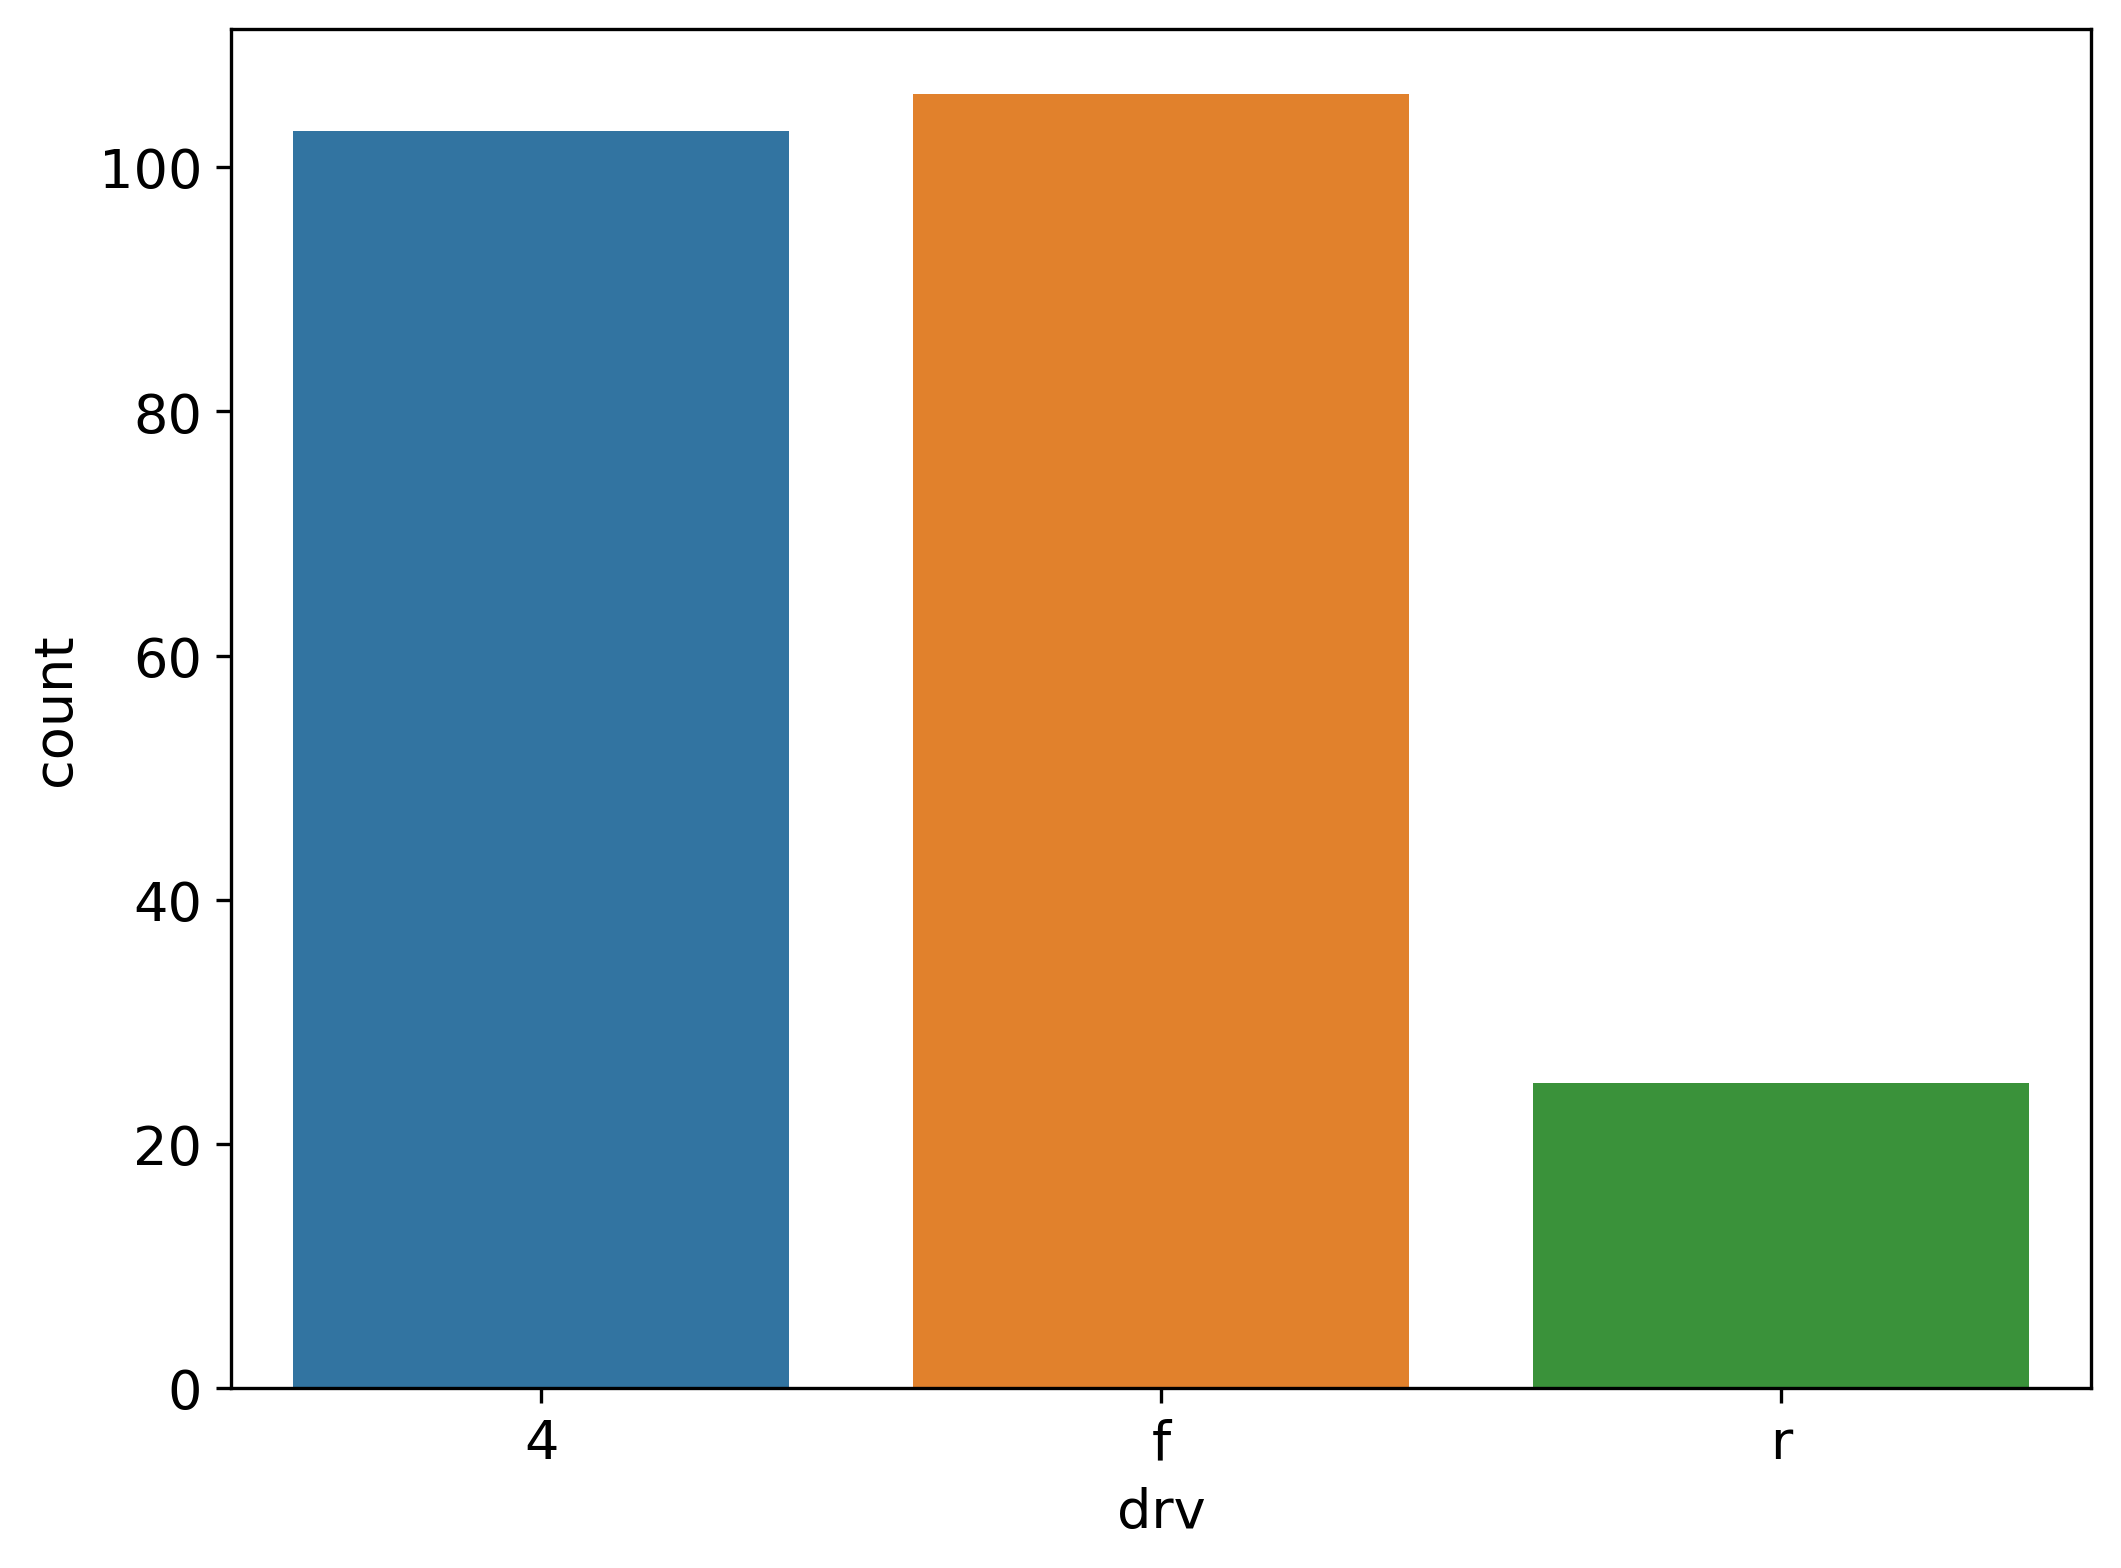

In [19]:
# 4, f, r array
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r'])

In [20]:
# drv 값을 빈도가 높은 순으로 출력하기
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object')

<AxesSubplot:xlabel='drv', ylabel='count'>

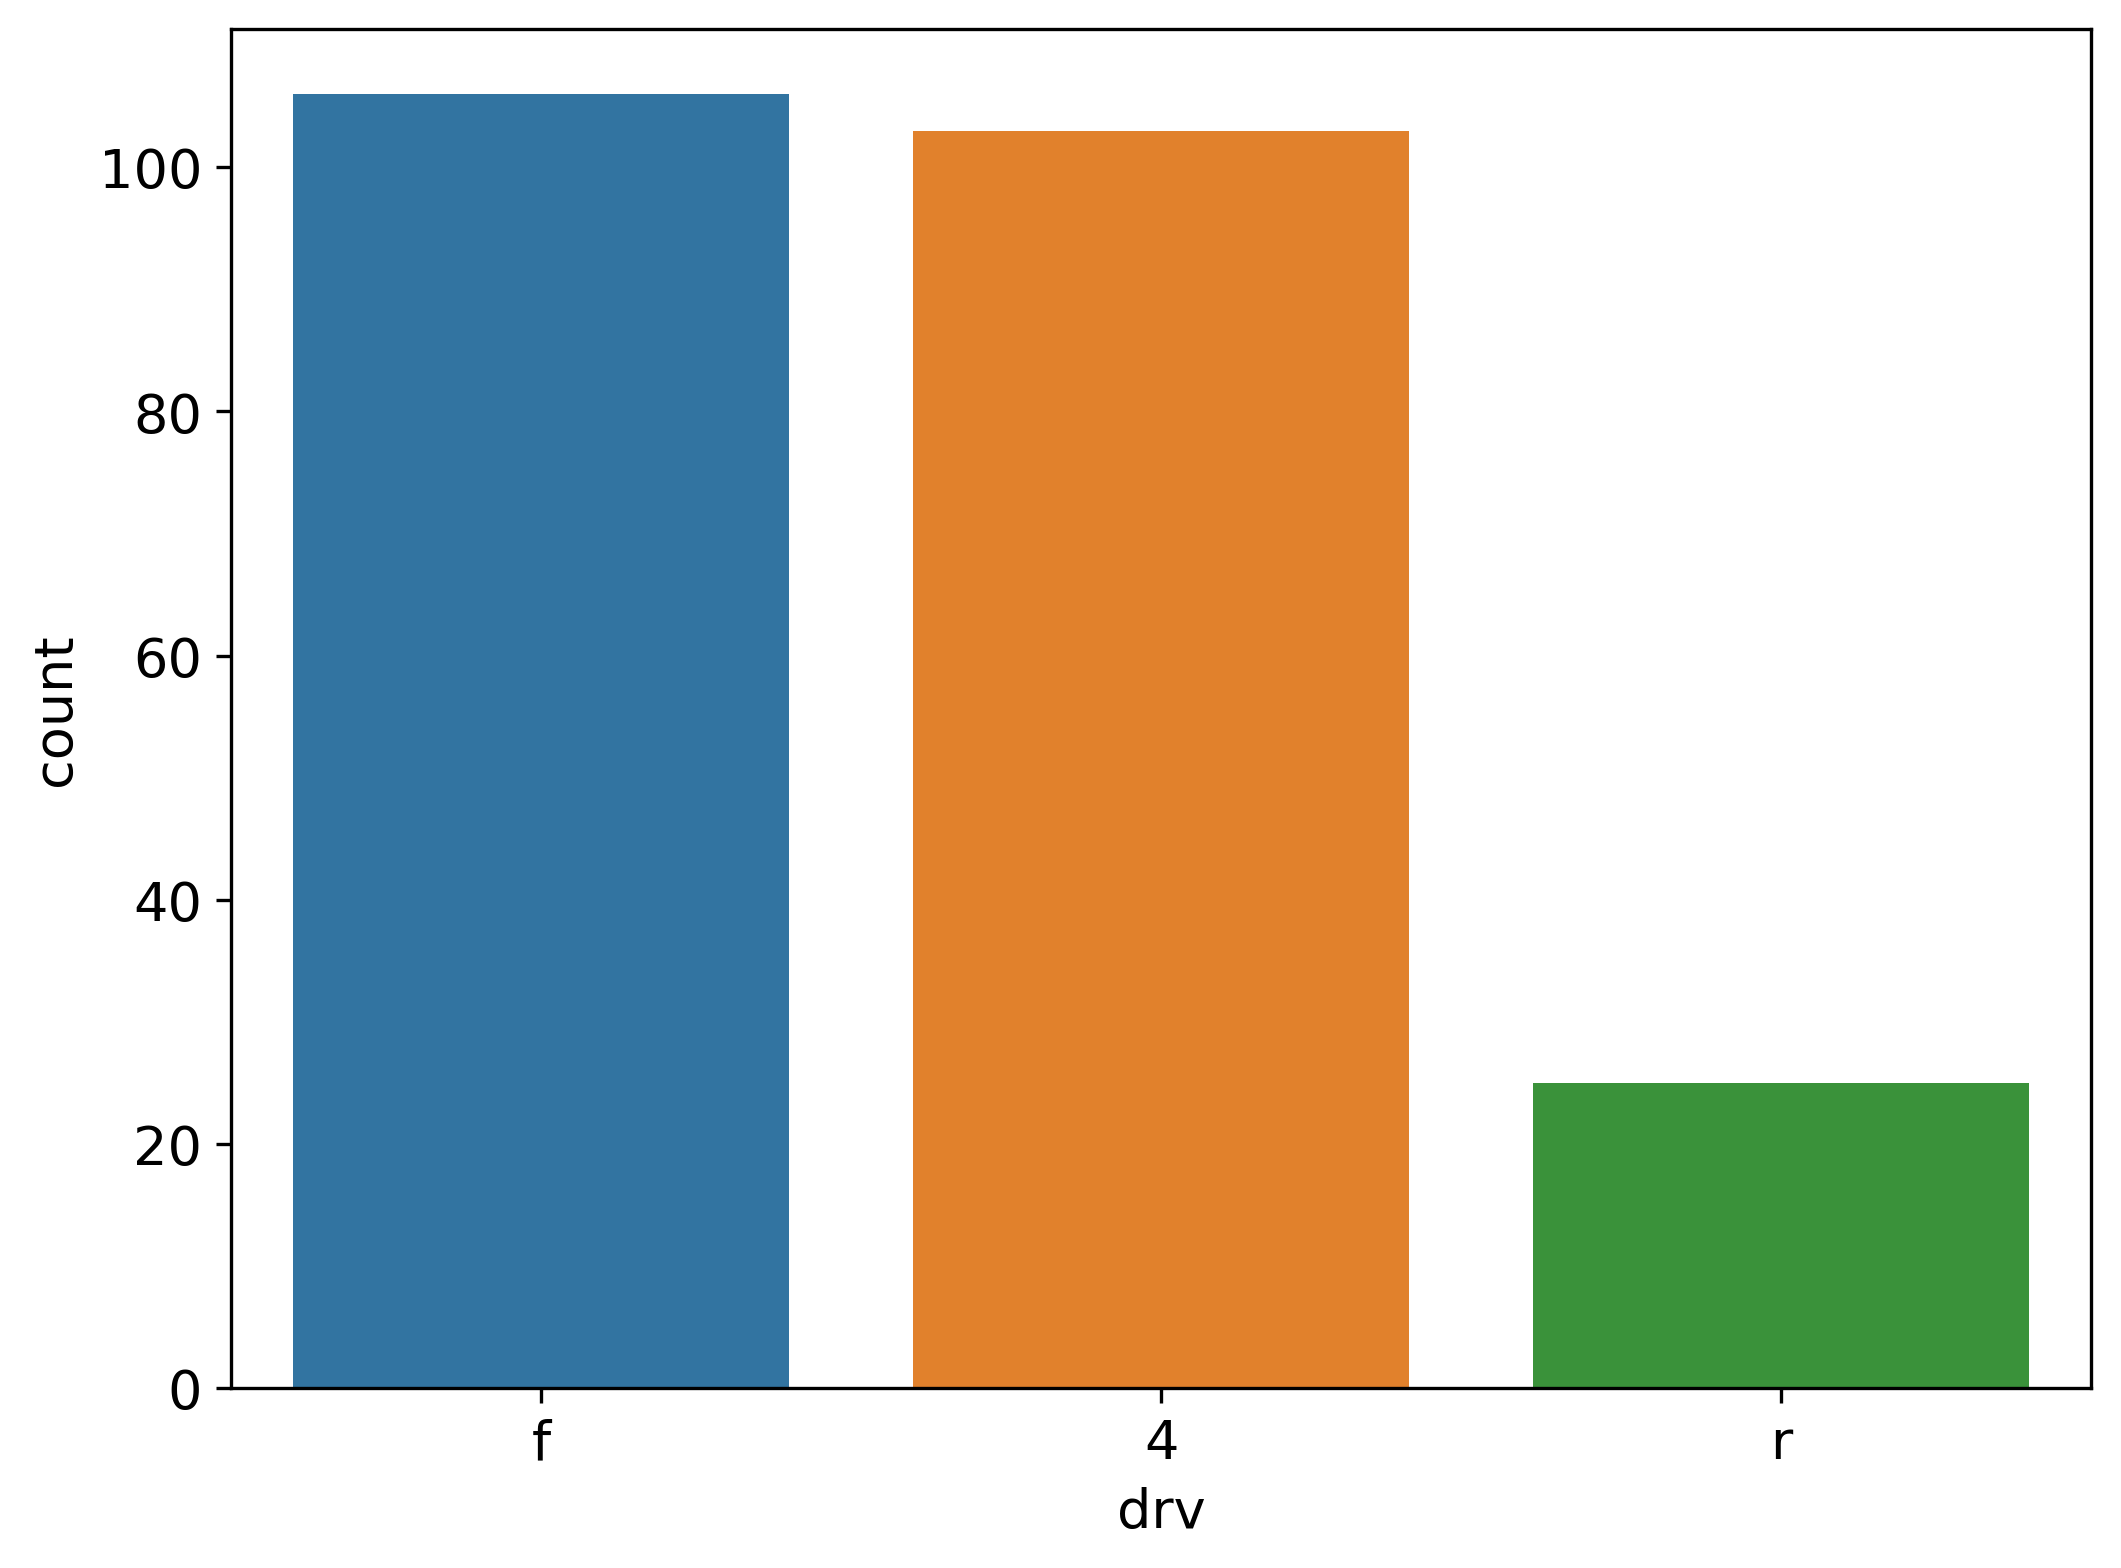

In [21]:
# drv 높은 순으로 막대를 정렬하기
sns.countplot(data = mpg, x = 'drv',
             order = mpg['drv'].value_counts().index)

In [22]:
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

df = mpg.query('category == "suv"')\
.groupby('manufacturer', as_index = False)\
.agg(mean_cty = ('cty', 'mean')) \
.head()

df

,manufacturer,mean_cty
0,chevrolet,12.666667
1,dodge,11.857143
2,ford,12.888889
3,jeep,13.500000
4,land rover,11.500000


<AxesSubplot:xlabel='manufacturer', ylabel='mean_cty'>

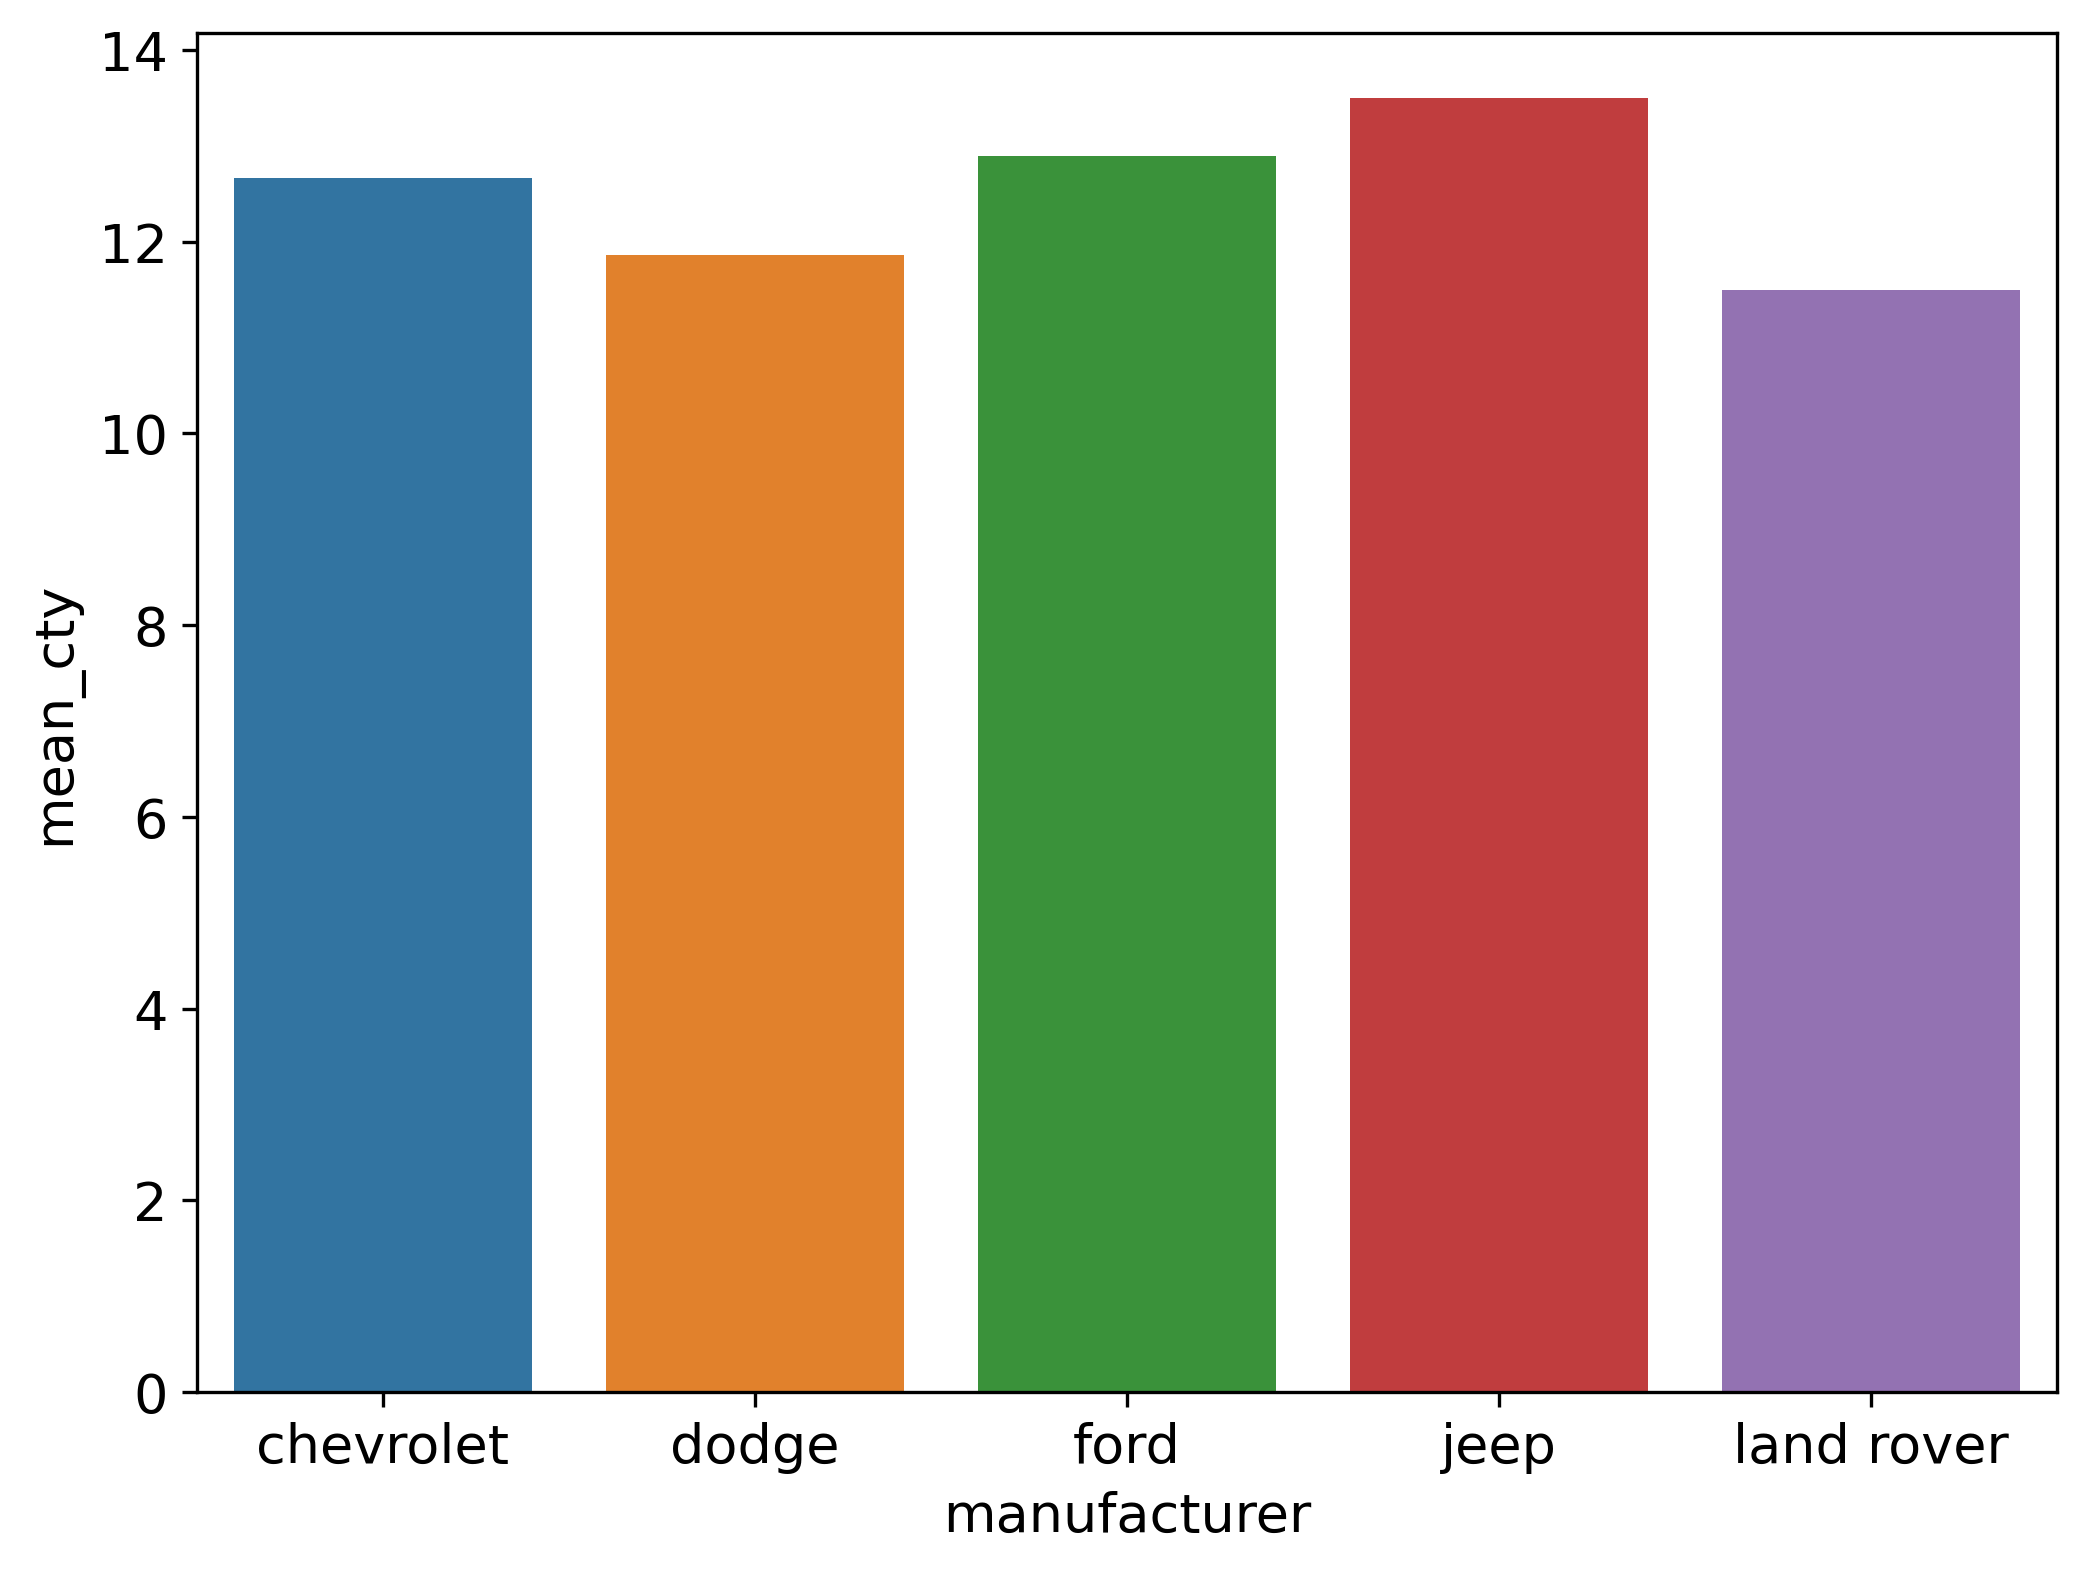

In [23]:
# make barplot
sns.barplot(data = df, x = 'manufacturer', y = 'mean_cty')

In [24]:
df_mpg = mpg.groupby('category', as_index = False)\
.agg(n = ('category', 'count')) \
.sort_values('n', ascending = False)

df_mpg

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


<AxesSubplot:xlabel='category', ylabel='n'>

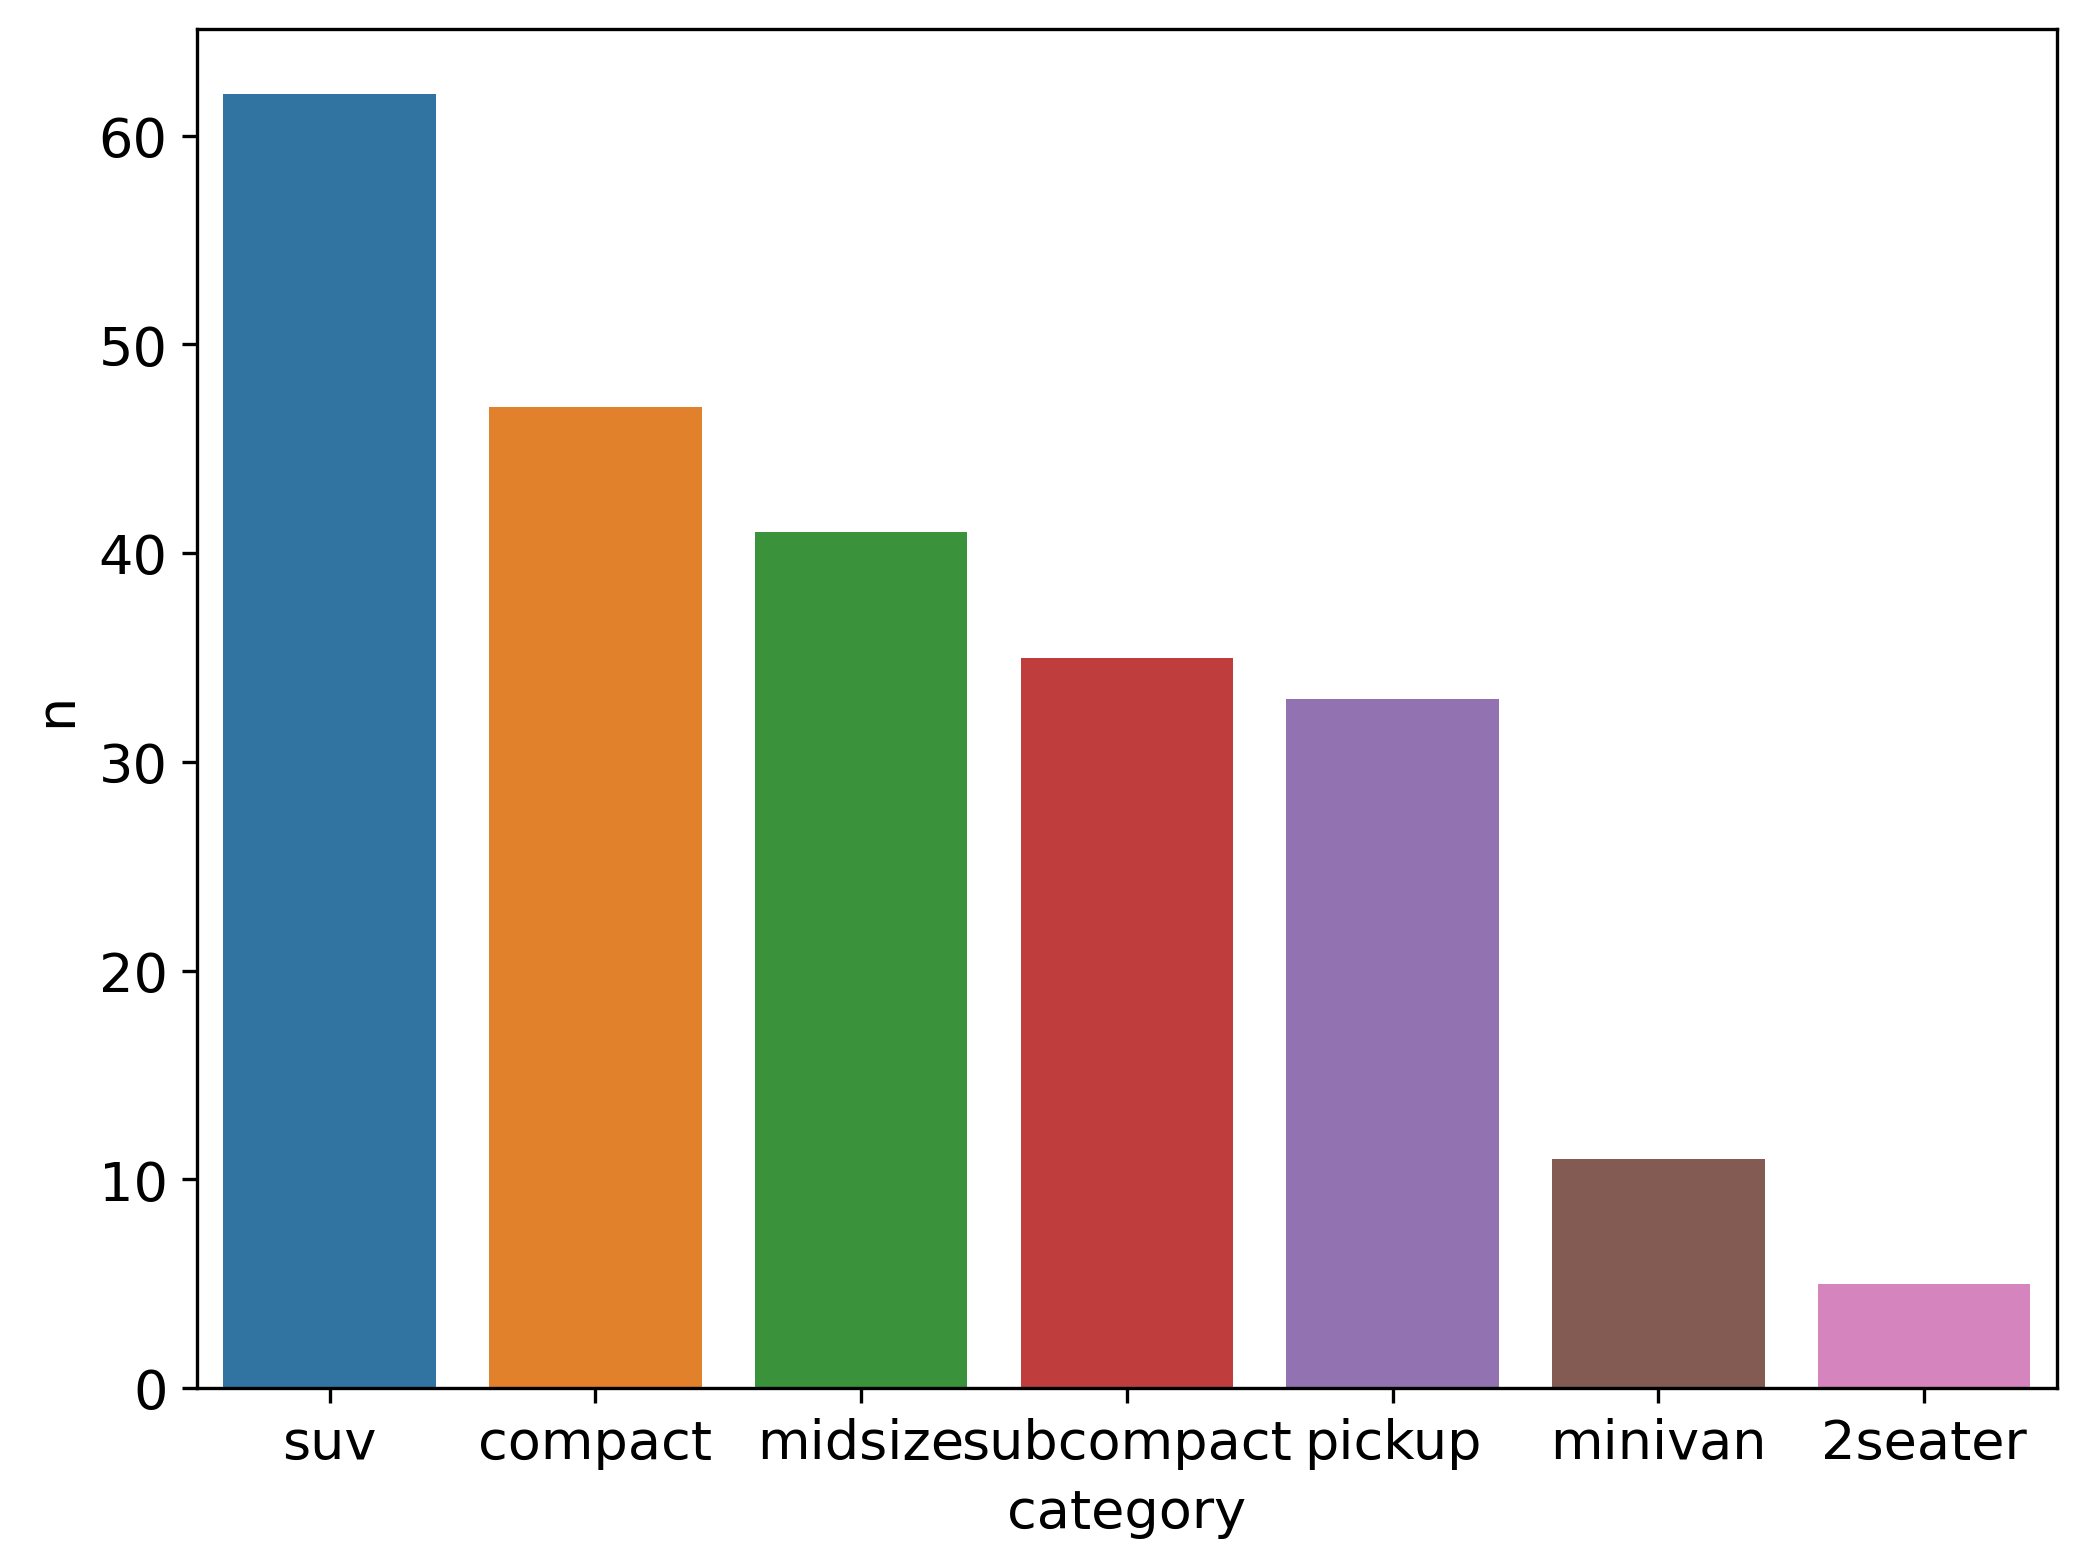

In [25]:
# make barplot
sns.barplot(data = df_mpg, x = 'category', y = 'n')

## 08-4 선 그래프 - 시간에 따라 달라지는 데이터 표현하기

In [26]:
# economics 데이터 불러오기
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<AxesSubplot:xlabel='date', ylabel='unemploy'>

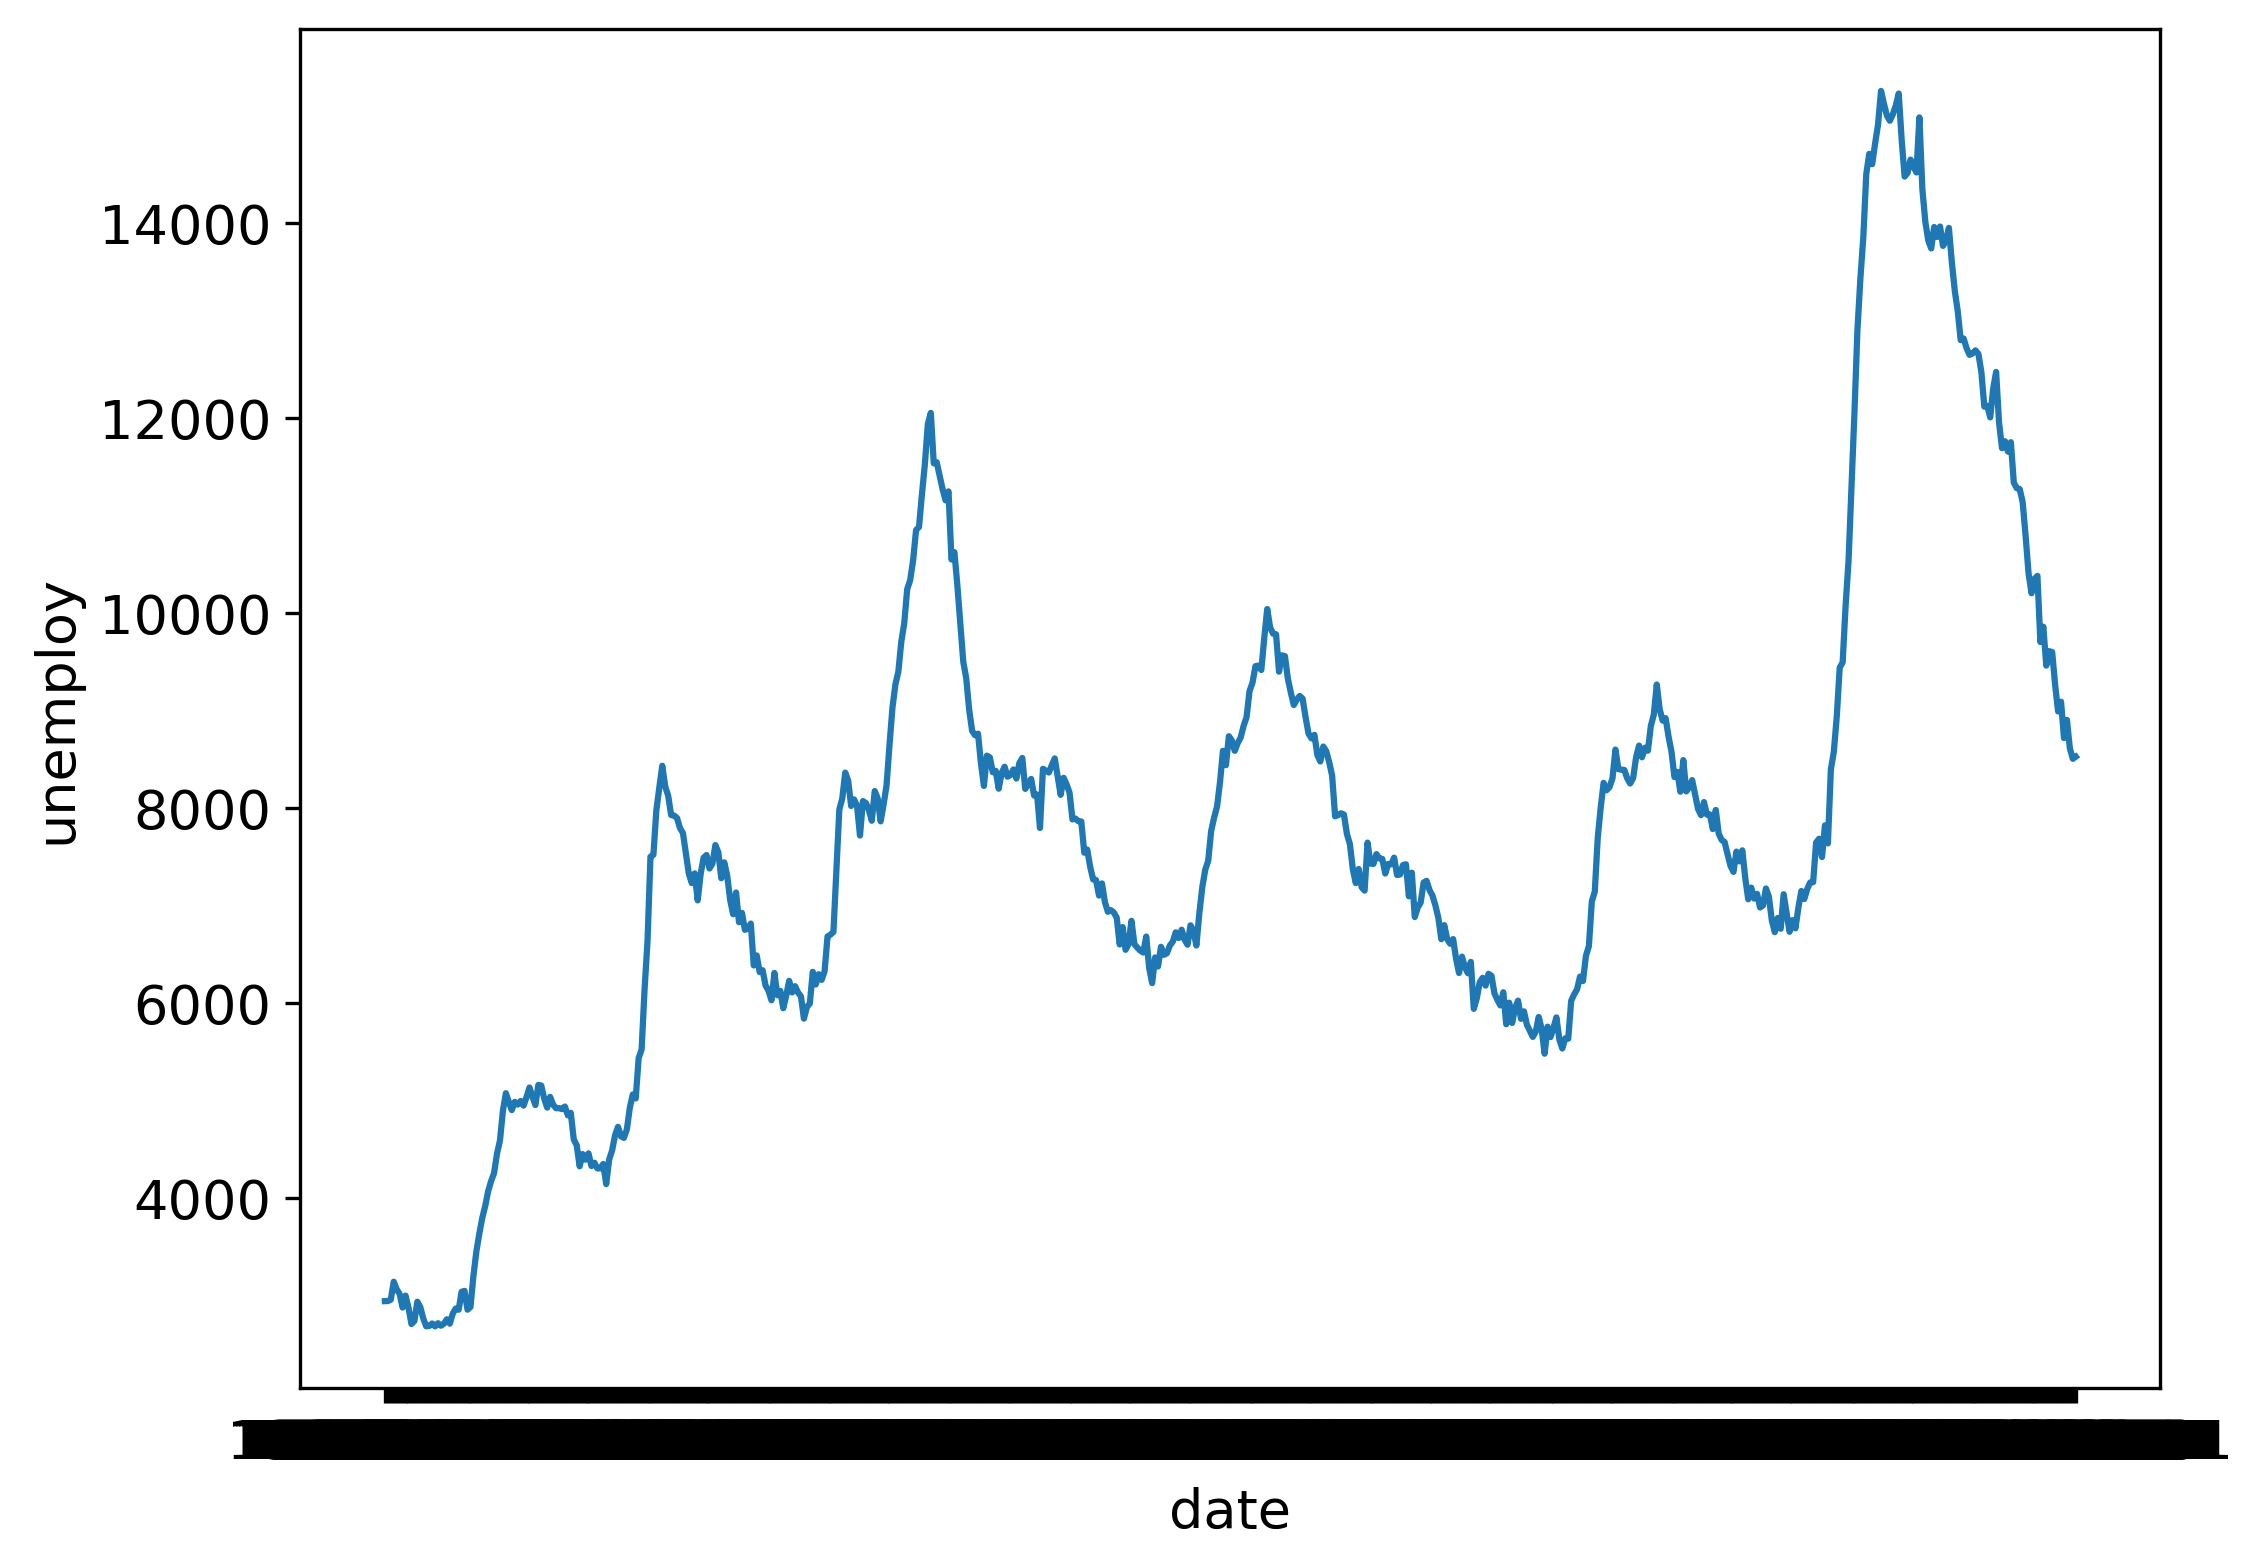

In [27]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [28]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 변수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [29]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [30]:
# 연 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [31]:
# 일 추출
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [32]:
# 일 추출
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [33]:
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<AxesSubplot:xlabel='year', ylabel='unemploy'>

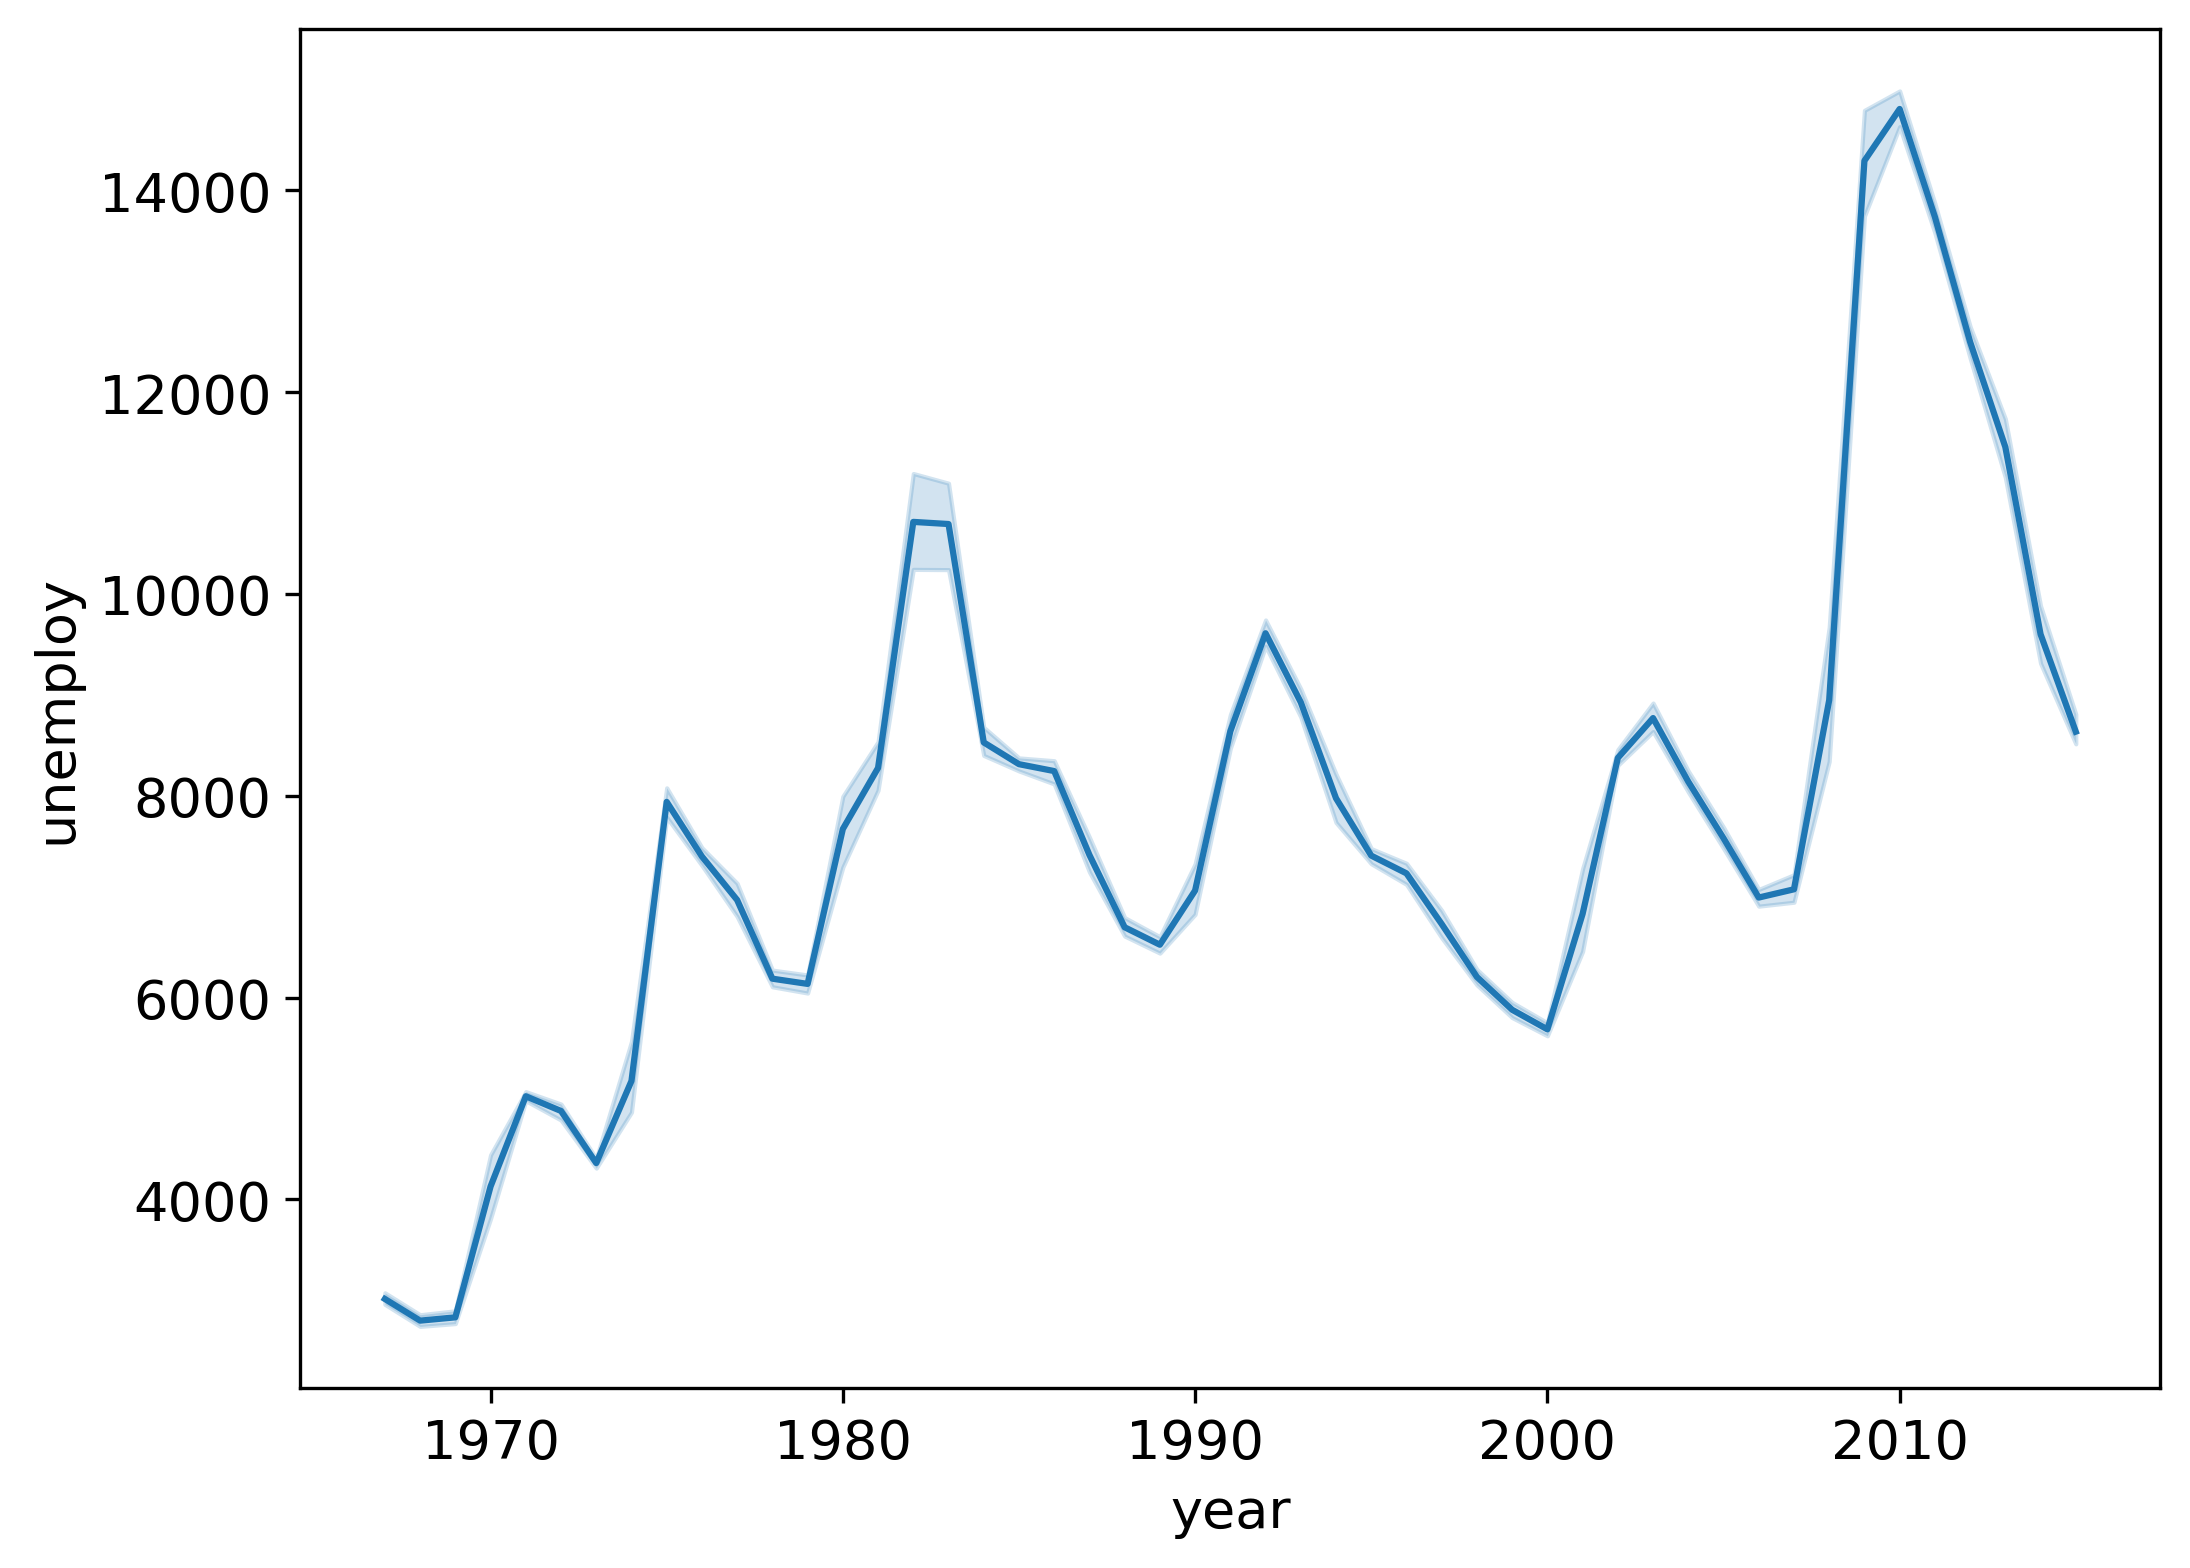

In [34]:
# x 축에 연도 표시
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

<AxesSubplot:xlabel='year', ylabel='unemploy'>

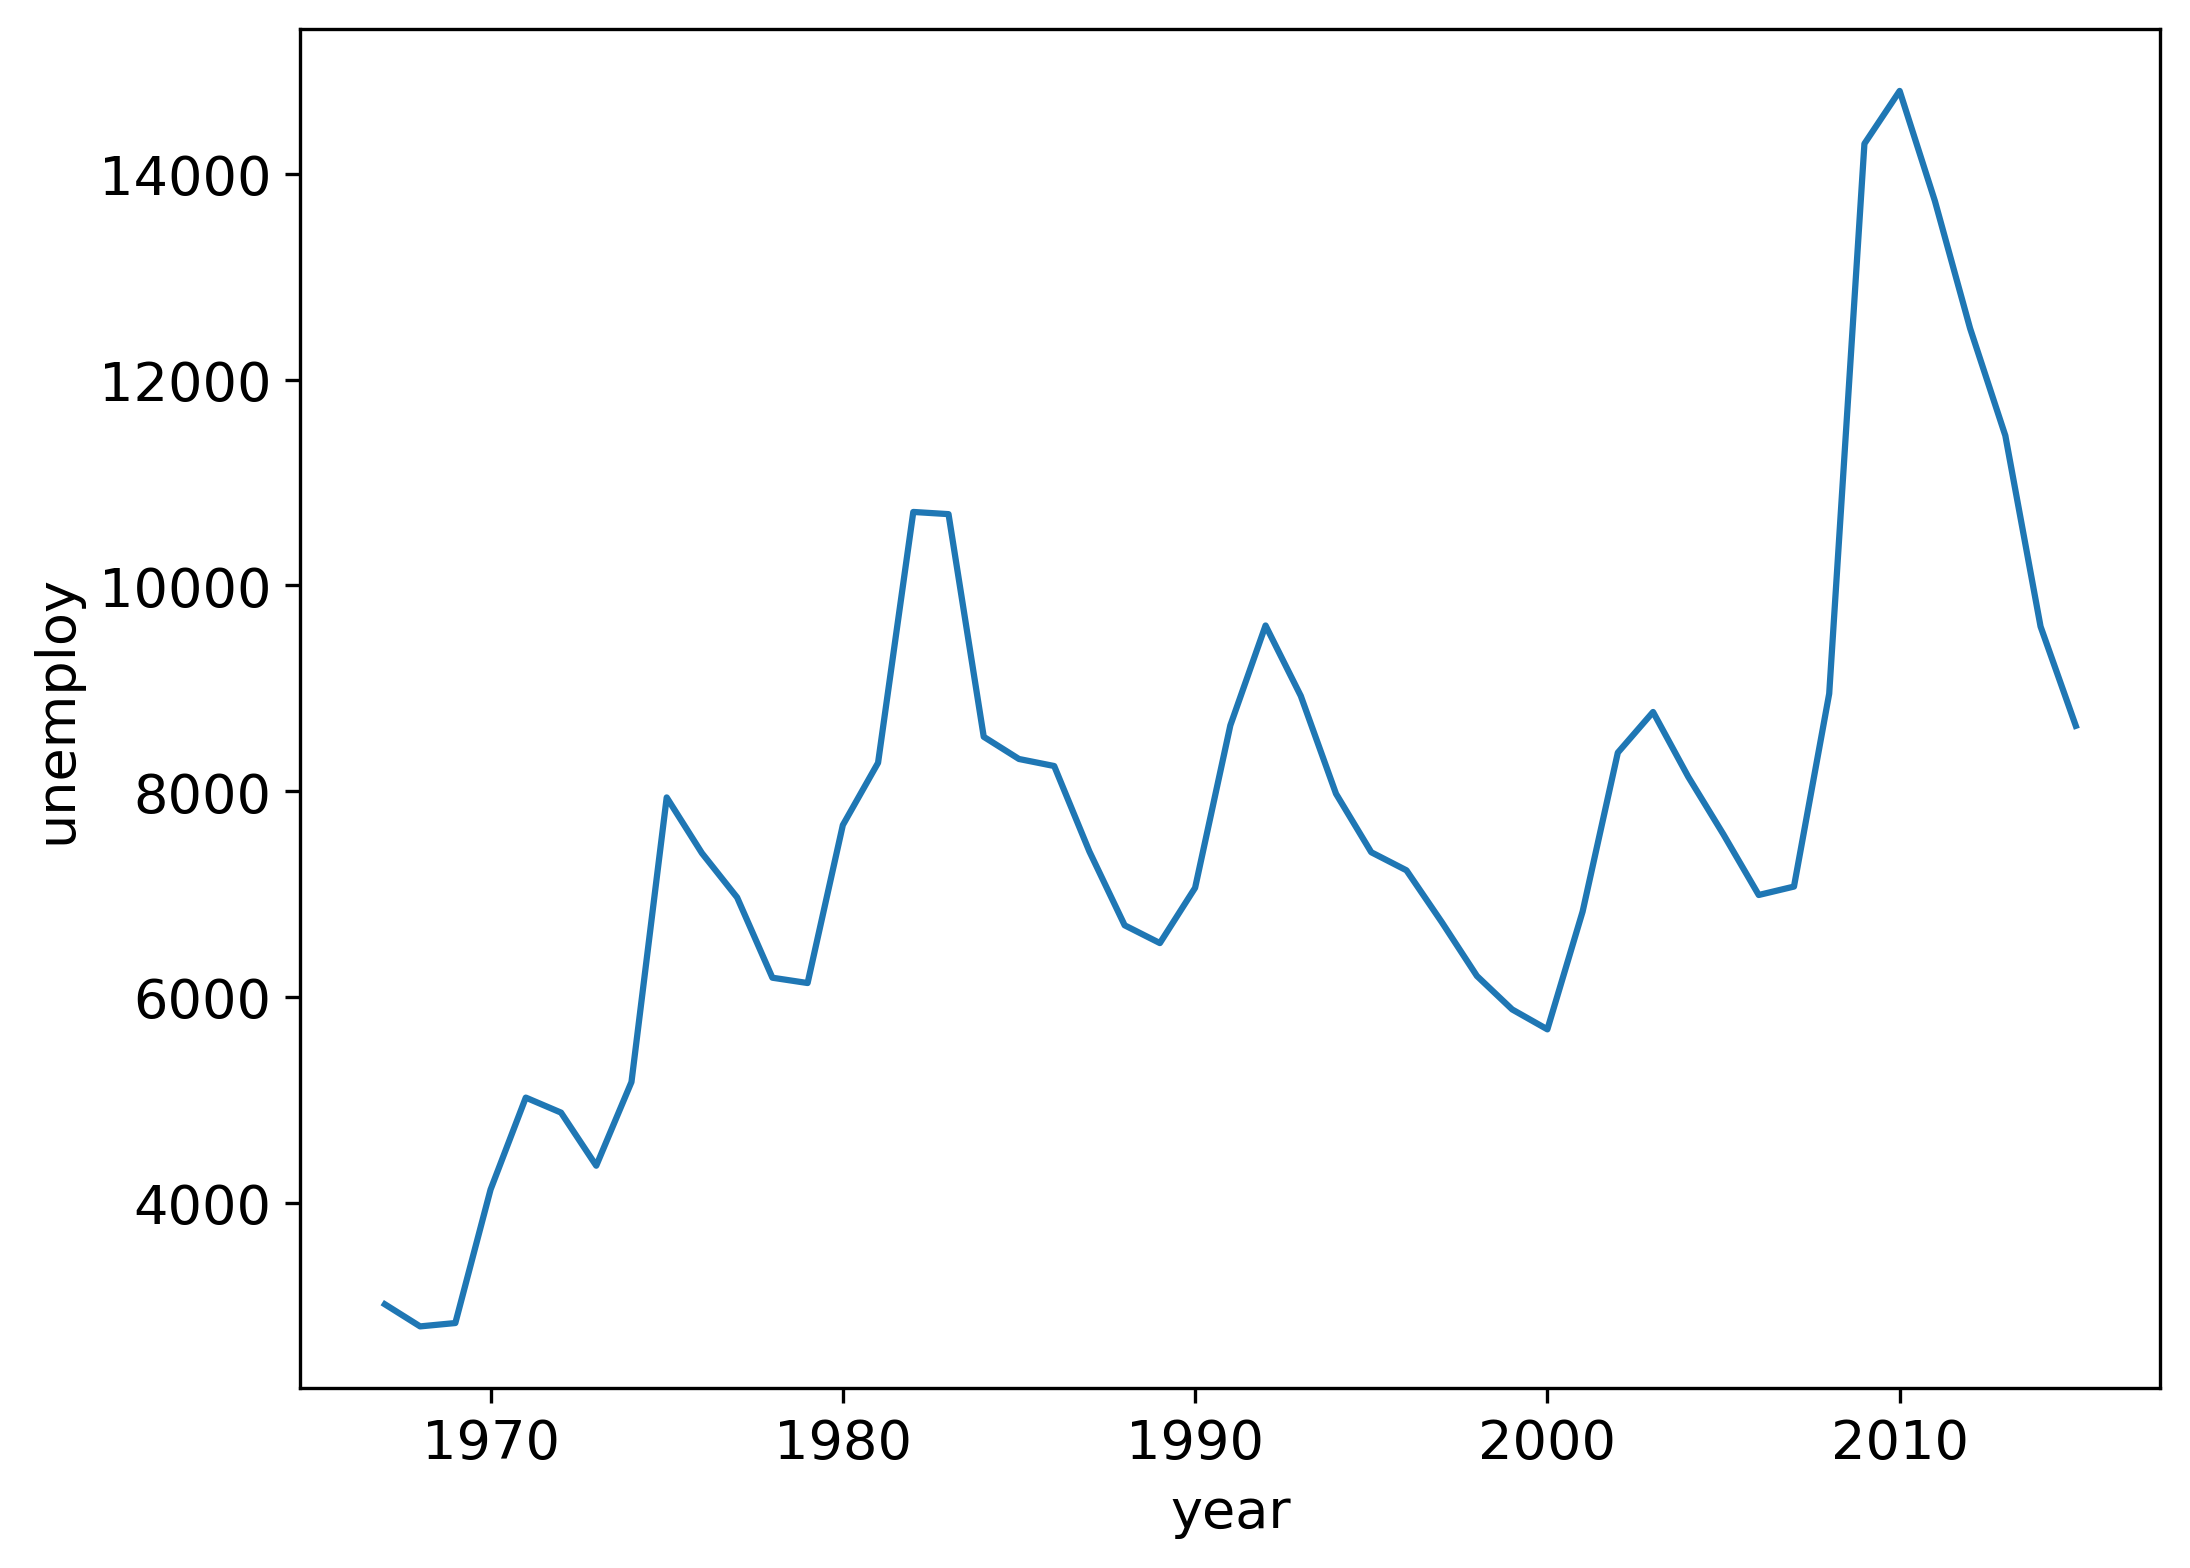

In [35]:
# 신뢰구간 제거
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)

### 혼자서 해보기

#### Q1

In [36]:
# data load
import pandas as pd
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [37]:
# 날짜, 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

In [38]:
# 년도 변수 추가
economics['year'] = economics['date2'].dt.year

<AxesSubplot:xlabel='year', ylabel='psavert'>

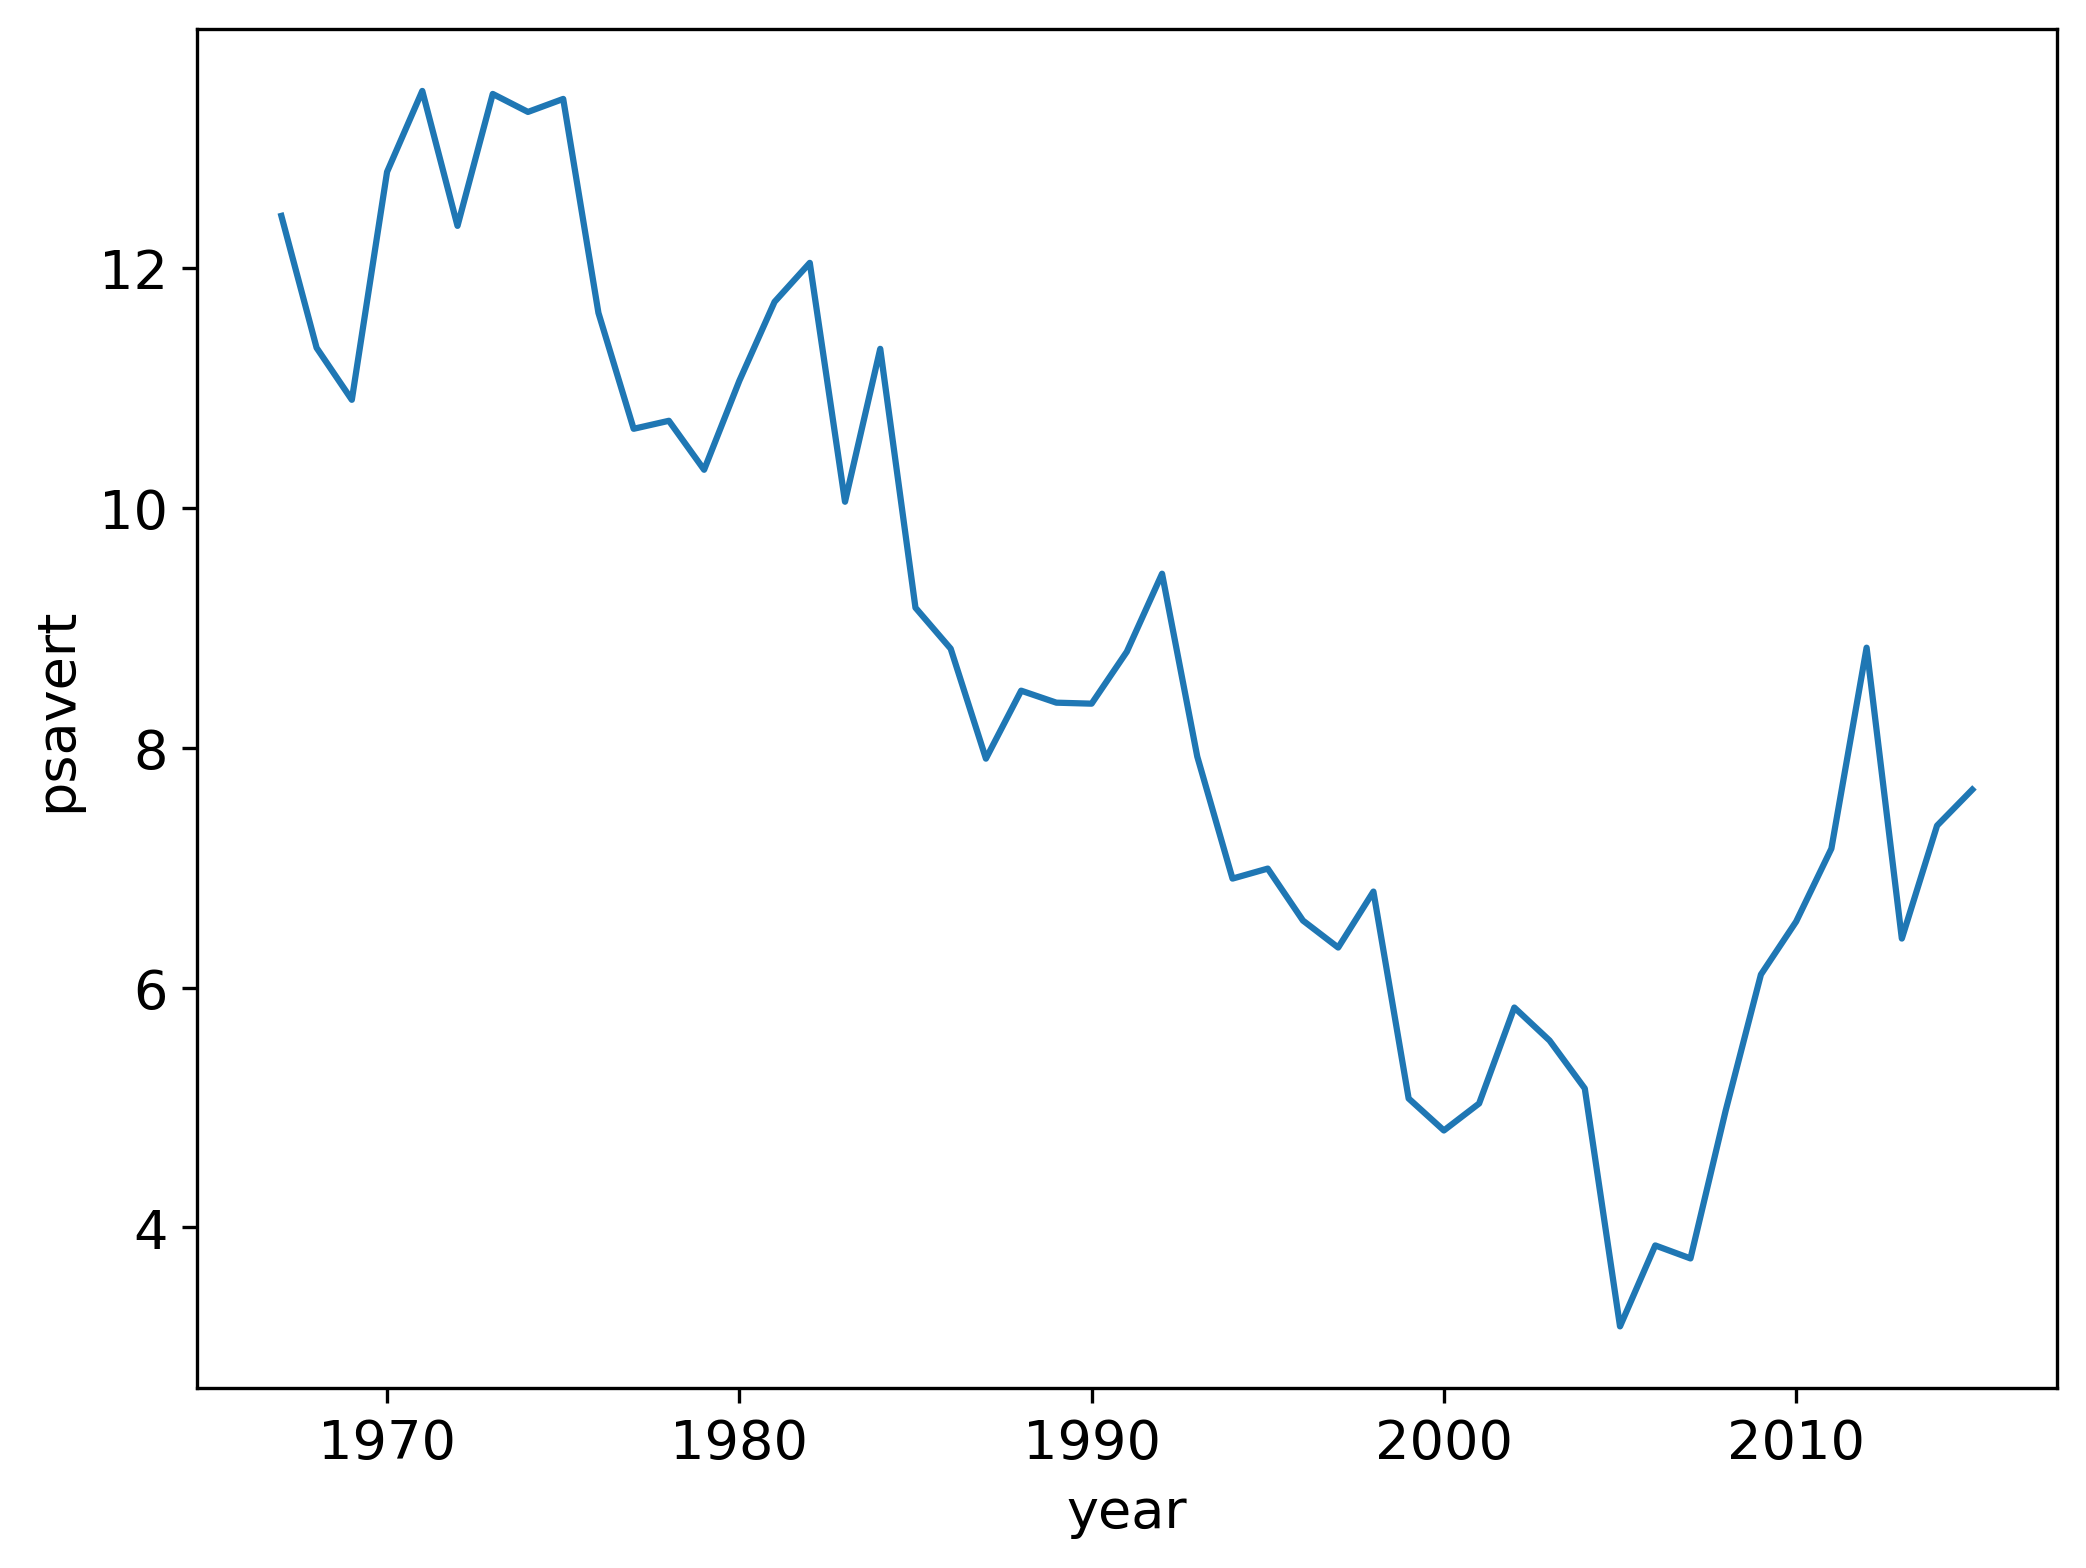

In [39]:
# 연도별 개인 저축률 선 그래프 제작
sns.lineplot(data = economics, x = 'year', y = 'psavert', ci = None)

#### Q2

In [40]:
# month 
economics['month'] = economics['date2'].dt.month

In [41]:
# 2014
df_2014 = economics.query('year == 2014')

<AxesSubplot:xlabel='month', ylabel='psavert'>

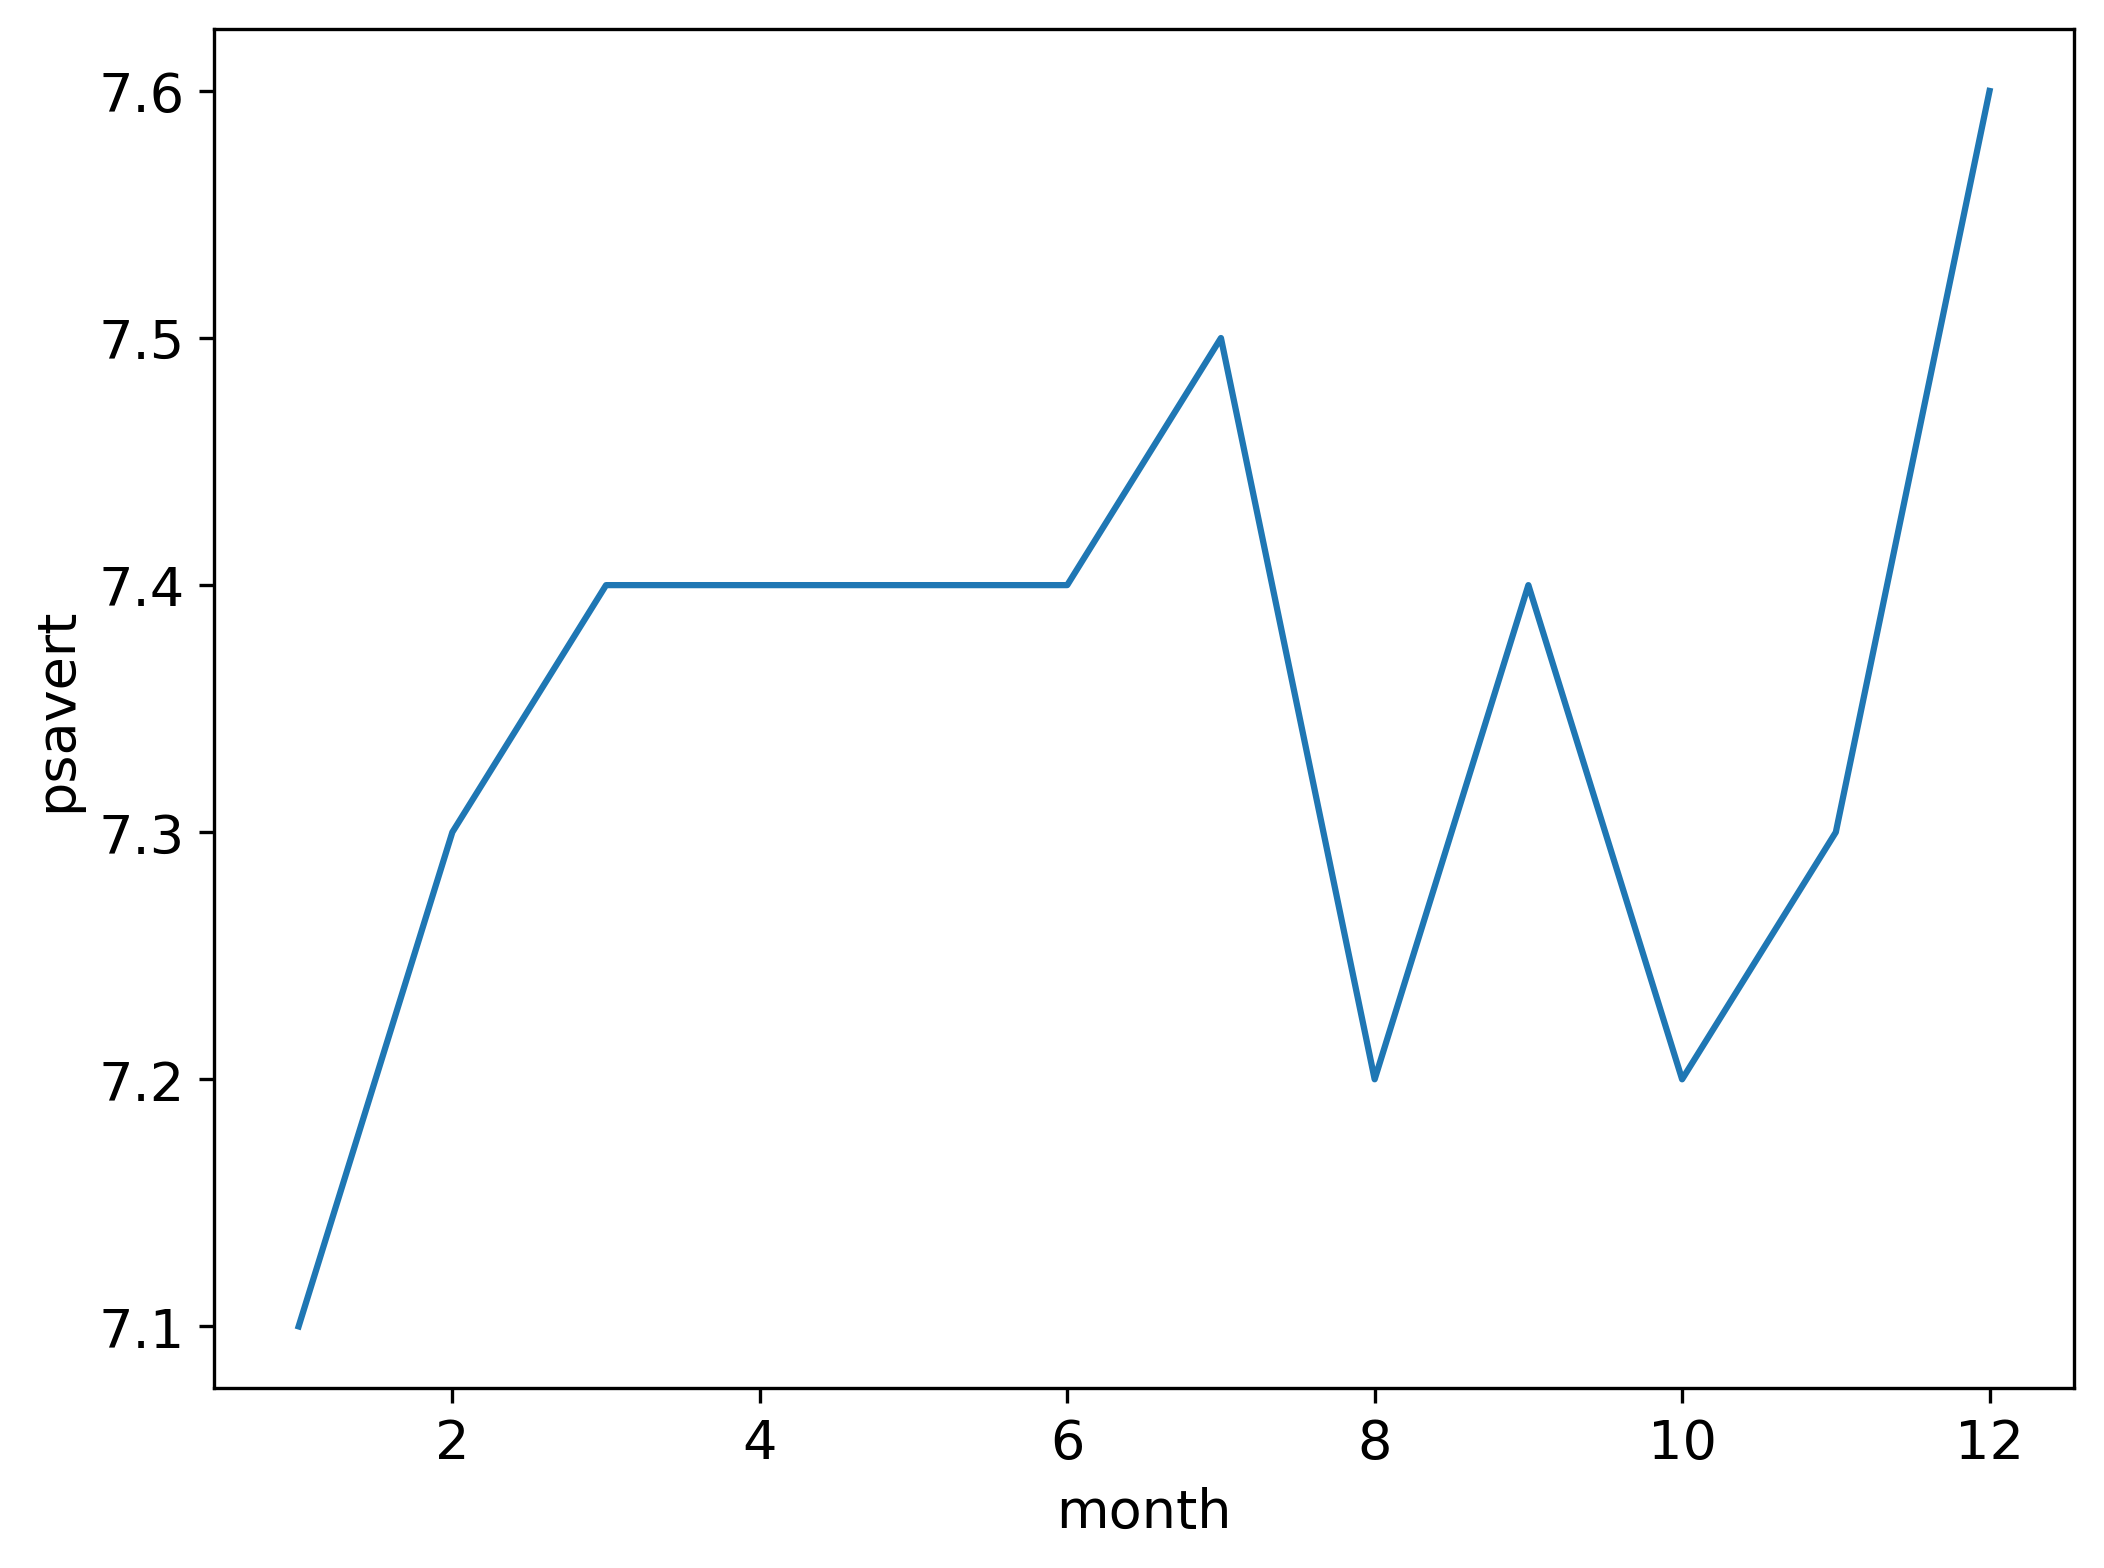

In [42]:
# linear Graph
sns.lineplot(data = df_2014, x = 'month', y = 'psavert', ci = None)

## 08-5 상자 그림 - 집단간 분포 차이 표현하기

<AxesSubplot:xlabel='drv', ylabel='hwy'>

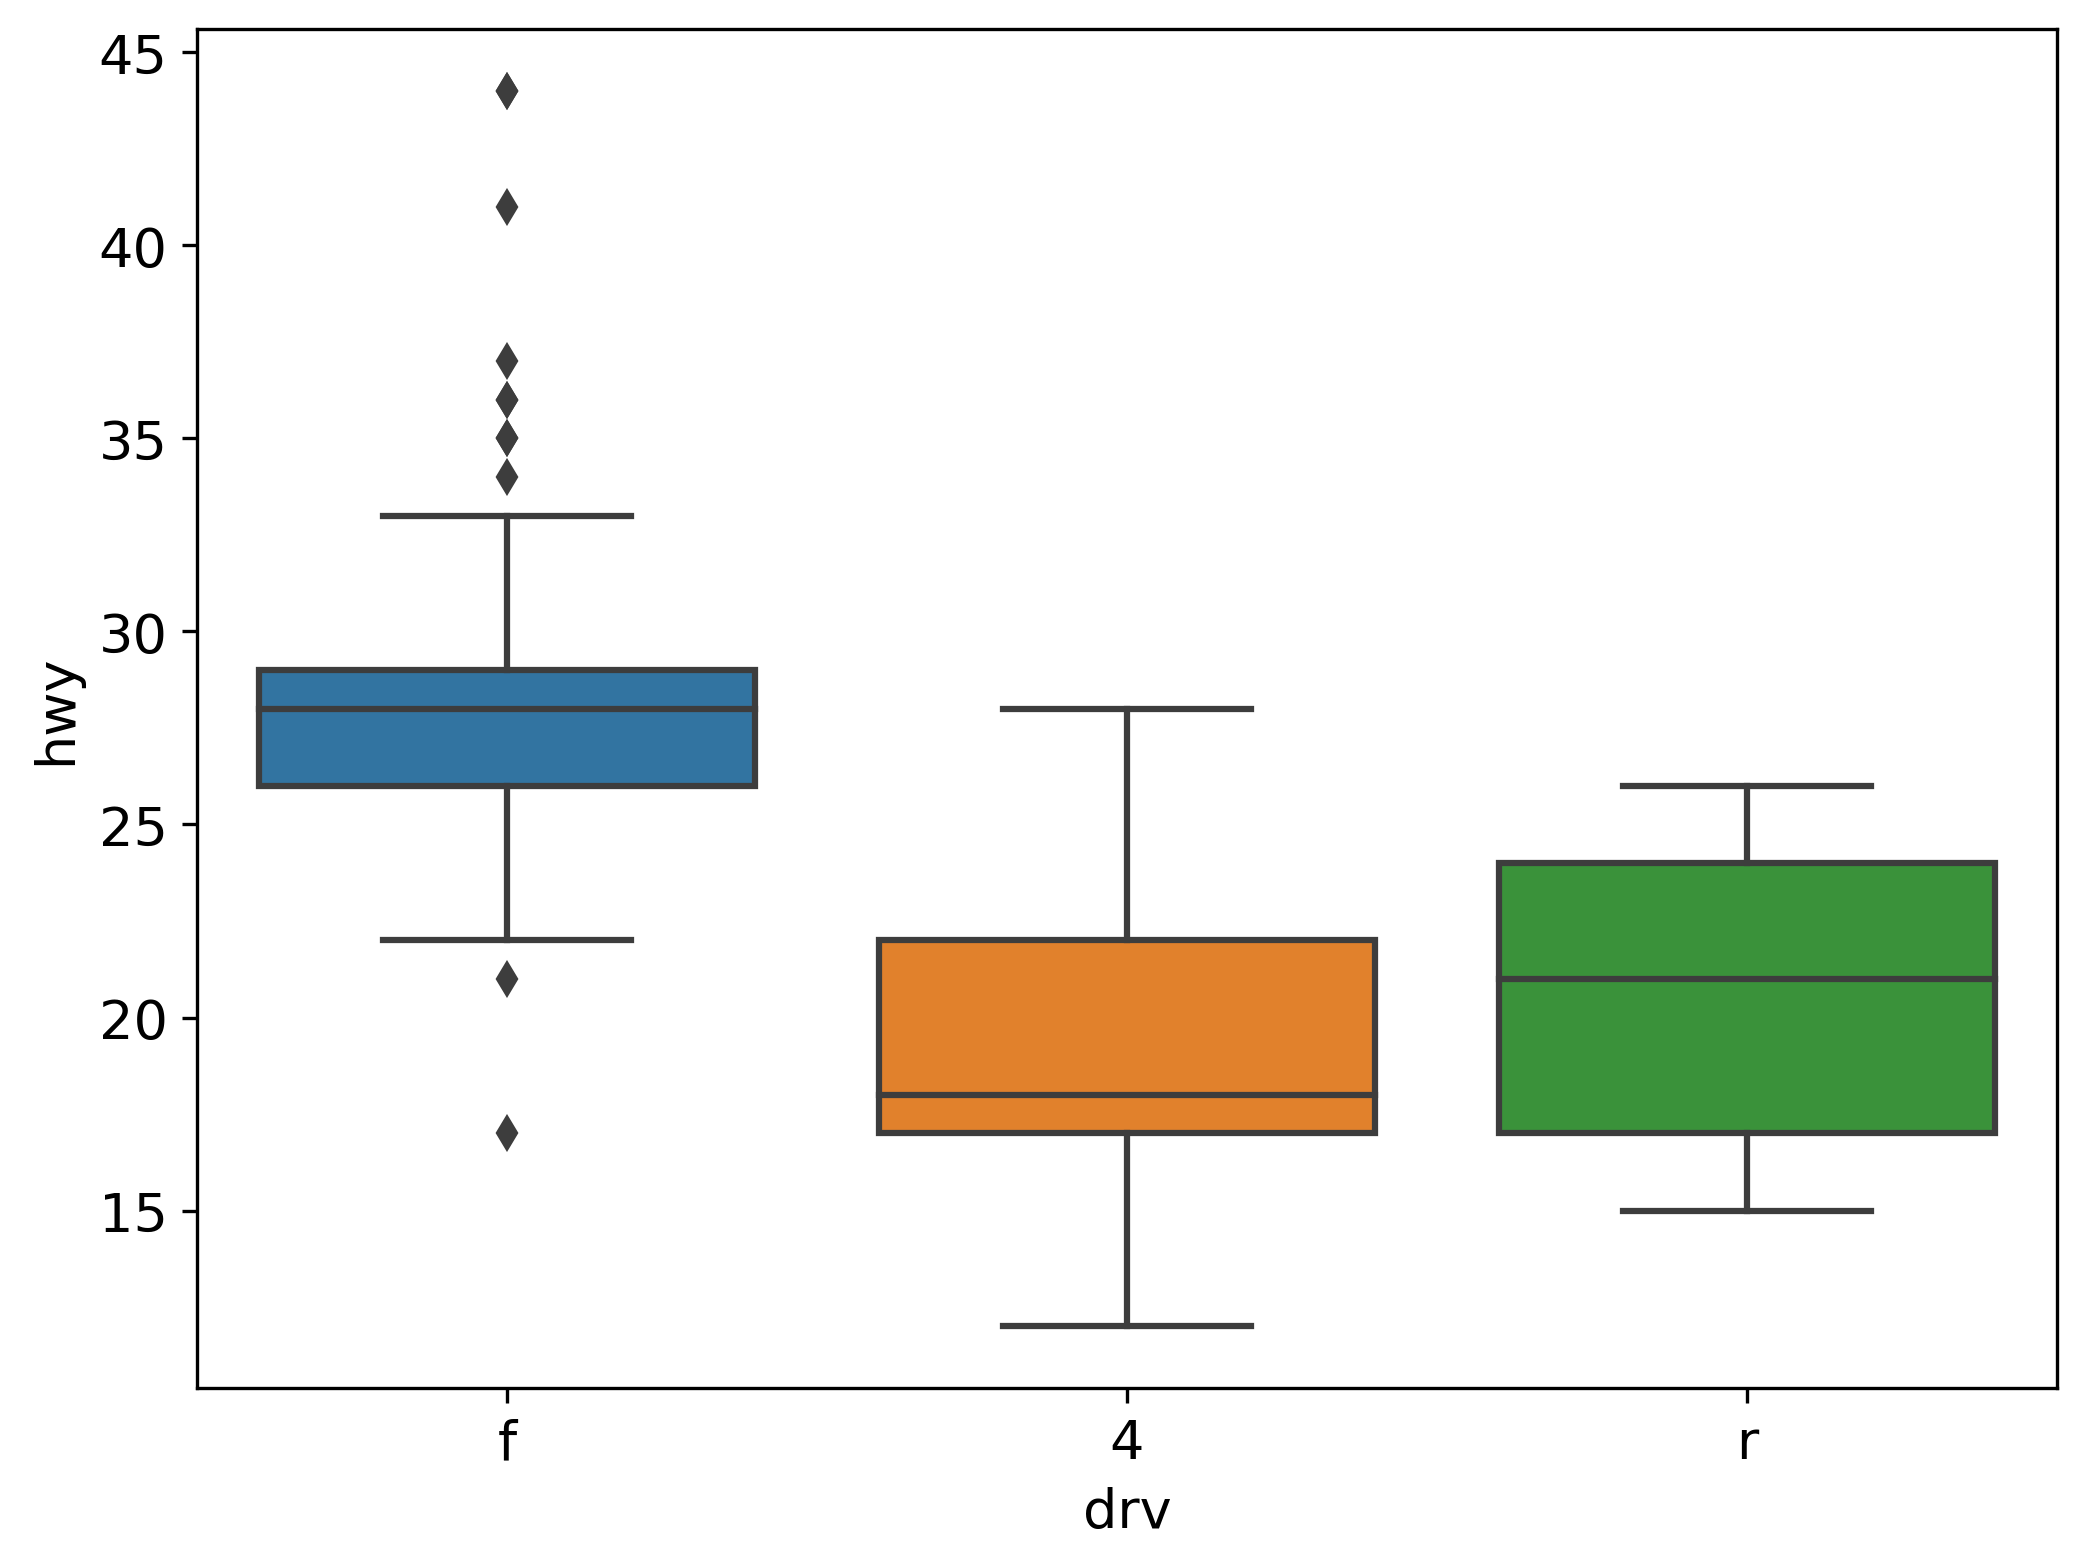

In [43]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

### 혼자서 해보기

#### Q1

<AxesSubplot:xlabel='category', ylabel='cty'>

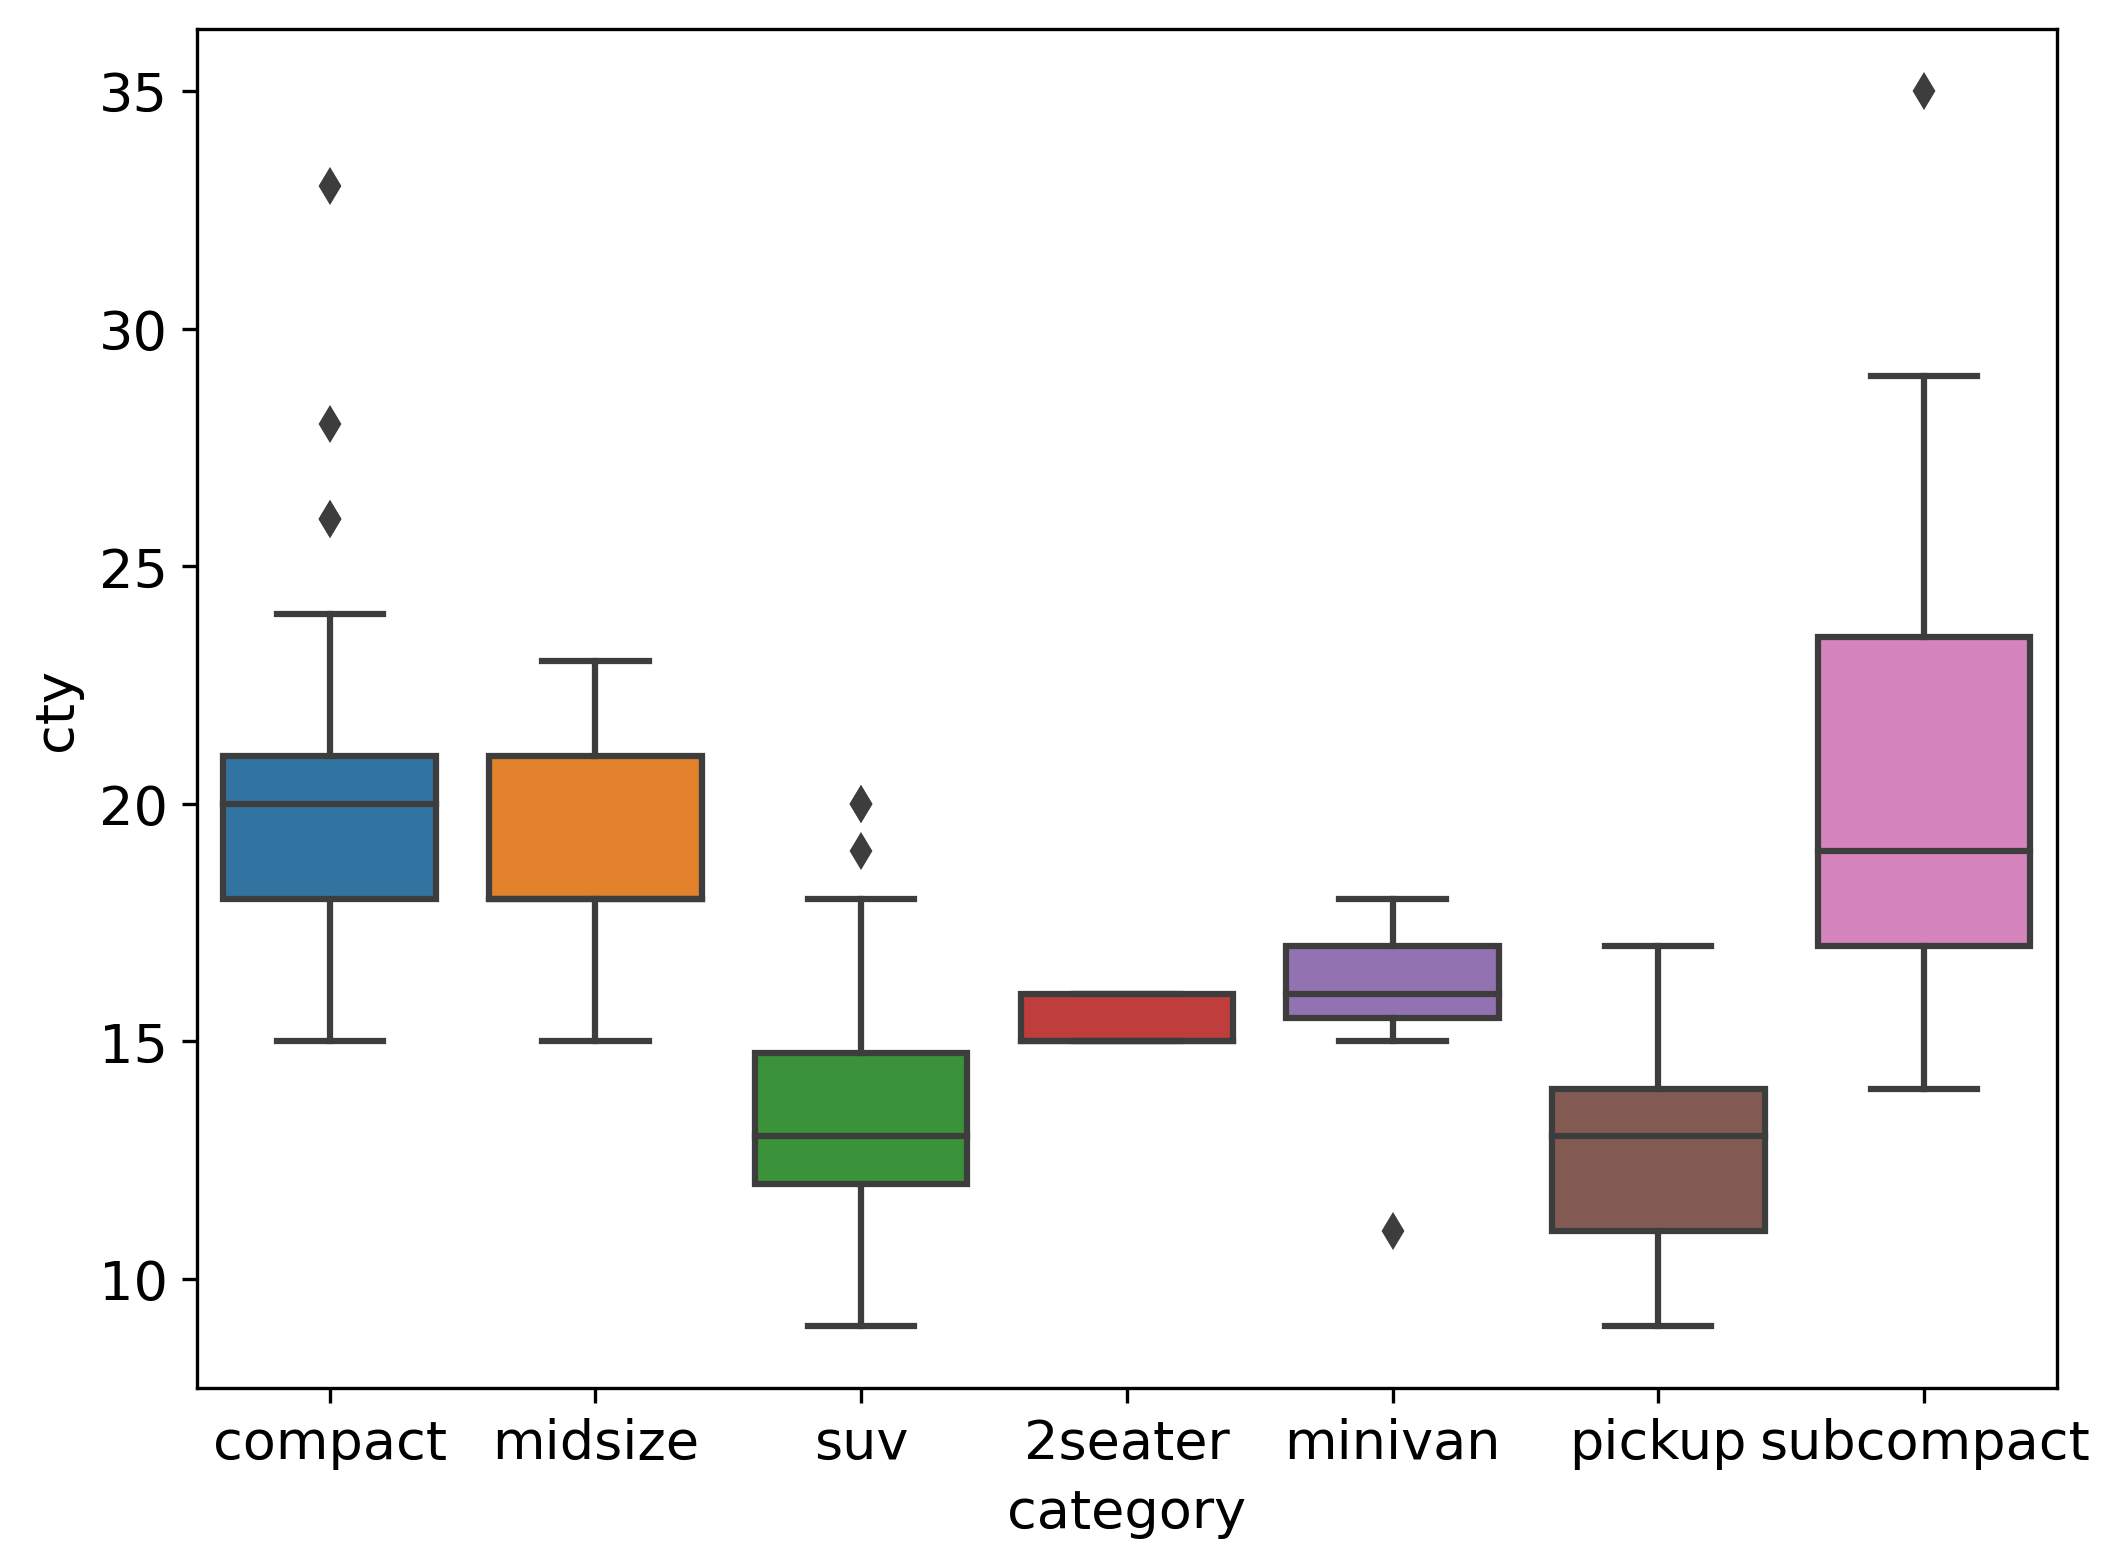

In [44]:
sns.boxplot(data = mpg, x = 'category', y = 'cty')